<a href="https://colab.research.google.com/github/sohataher/NLP-Course/blob/main/NLP_Day3_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

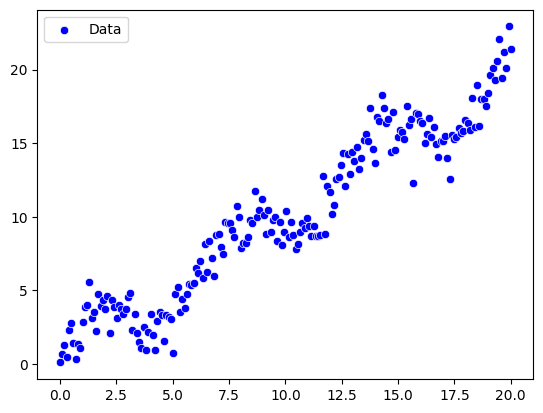

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([0.0943]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.4572]])]

In [96]:
# construct the model using Linear block
in_features = 1
out_features = 1
# model_2 = nn.Linear(in_features,out_features)

model_2 = nn.Sequential(
    nn.Linear(in_features, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 32),
    nn.ReLU(),
    nn.Linear(32, out_features)
)

In [97]:
loss_fn = nn.MSELoss()

In [98]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.0001)

In [99]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [100]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [101]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

131.15345764160156
209.14278411865234
218.86077499389648
316.17985916137695
373.0580520629883
373.23872005939484
426.84150326251984
436.6550017595291
437.14145535230637
438.106684923172
438.42044508457184
439.29362791776657
444.7906953692436
444.83372067287564
471.245677459985
821.1944994814694
926.8776583559811
1004.4684939272702
1395.4282717593014
1661.4005007632077
2039.9969668276608
2117.5609545595944
2210.137408722192
2312.2226595766842
2524.1477389223874
2602.8938479311764
2745.724261749536
2823.0893359072506
3151.589885223657
3187.1372141726315
3376.9308695681393
3692.502768982202
3794.0080637820065
3824.735019195825
3831.2754311449826
3923.081400383264
3970.289640892297
3983.7337555773556
3996.179596412927
4011.9426245577633
4012.011934455484
4225.436525519937
4309.880975898355
4534.454965766519
4534.686001192778
4603.061718355864
4613.67331732437
4622.700193773955
4708.936758410186
5175.551412951201
5410.641485583037
5596.930441271514
5606.638727556914
5623.67645682022
5711.27

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

134.2343292236328
142.25003719329834
144.19745659828186
144.381084933877
149.51758958399296
149.518561770441
182.11164038372226
192.26141493511386
197.9851569433231
250.86155693721958
253.18509857845493
268.53229706478305
276.5553015966434
283.61524002742954
284.00173052144237
350.0656572182197
468.6250520546455
816.766043265583
1114.8811555702705
1156.9063783485908
1202.0550676186103
1259.6322236855049
1294.0333429176826
1443.7562433083076
1581.9856744606514
1592.208839019062
1708.6536022026557
1708.9473324019928
1933.7543392379303
1934.603016396286
1985.252975960495
1988.1572420794982
2115.439850111725
2115.4830413211603
2155.1032348026056
2155.1079069592524
2155.1974661566783
2406.5947439887095
2453.2002012946177
2456.1096191622782
2630.8038330294657
2667.2575569369365
2845.7284736849833
2845.752704288112
2970.685496951686
2978.0630122676957
3125.8515254512895
3212.0891887203325
3366.106614257442
3379.679461623775
3419.4307471767534
3422.979504014598
3609.0135311142076
3744.11416282

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2873494327068329
9.424423903226852
89.33660957217216
312.9842993915081
367.7718627154827
375.55365297198296
488.6278564631939
616.1245376765728
636.9696762263775
640.9548241794109
736.3476998507977
756.494067877531
772.3106553256512
775.709523409605
805.610194414854
806.4440457522869
925.6292187869549
960.7361561954021
1122.5019032657146
1132.6520049273968
1258.5455290973186
1264.2329070270061
1450.150356978178
1468.1951567828655
1573.7087981402874
1621.335114210844
1695.7615058124065
1813.1492011249065
1815.3243004977703
1823.1094805896282
1867.286623686552
1874.1022031009197
1970.4537732303143
1976.0168263614178
2028.4603802859783
2173.287971228361
2196.924668997526
2363.4890153110027
2378.2427727878094
2475.205884665251
2484.371979445219
2494.3372742831707
2505.8537690341473
2511.1332270801067
2535.985926359892
2535.994077881798
2536.702766498551
2557.3564892616123
2557.3953304048628
2564.111649012193
2837.4737705942243
2840.0314919706434
2844.226227020845
2940.903000092134
2962.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.8084716796875
59.1571159362793
165.26741409301758
174.23150444030762
271.8474864959717
291.0928039550781
382.4252624511719
410.49906158447266
445.06186294555664
454.4875078201294
466.45891666412354
470.04652667045593
475.6709053516388
520.4247086048126
522.2352969646454
595.3076694011688
607.8938834667206
616.121022939682
616.9660172462463
667.3224892616272
741.9093041419983
756.5660157203674
766.4416575431824
776.275173664093
784.892171382904
870.3117880821228
920.9568457603455
998.5362753868103
1021.8322329521179
1025.2453265190125
1148.1942553520203
1186.353389263153
1298.1858859062195
1315.196168422699
1349.2917189598083
1362.207796573639
1370.839105129242
1601.1132292747498
1665.4547209739685
1667.2906633615494
1722.7613016366959
1725.8597685098648
1729.8264273405075
1742.6583107709885
1837.6569603681564
1895.7358940839767
1898.4361959695816
1915.1057115793228
1998.9110170602798
2121.195875763893
2154.0543237924576
2194.531626343727
2343.8979593515396
2375.0925394296646
2423.376

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.7695975303649902
5.896833419799805
89.47143363952637
138.14085578918457
166.44274520874023
207.4509735107422
209.96696376800537
274.70533657073975
274.87747843563557
383.8902042657137
461.21025736629963
532.4832828789949
538.7836163789034
615.2790768891573
657.6433919221163
717.9981396943331
751.9871266633272
818.3055394440889
820.382395580411
865.4169452935457
882.5941913872957
922.2739017754793
1070.9450748711824
1102.885693386197
1105.3698457032442
1328.787738159299
1459.0560181885958
1475.392546966672
1517.7140763550997
1518.3038192540407
1519.6966746598482
1564.1903193742037
1600.2179492264986
1671.1254351884127
1700.9221862107515
1754.275881126523
1809.5371039658785
1897.8040183335543
1901.1080563813448
1943.2651494294405
1996.0305684357882
1998.6224737912416
2001.641828134656
2018.8731036931276
2054.7272487431765
2075.623059824109
2076.755380347371
2197.0947968512774
2222.9268795996904
2249.109140112996
2250.573397114873
2306.311735585332
2331.7936768084764
2331.877728946507
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

29.936012268066406
163.21475982666016
204.0955581665039
276.5552749633789
313.29477310180664
371.72129821777344
411.4342613220215
421.5444526672363
465.8453826904297
516.069652557373
537.1562652587891
541.9811239242554
597.9702215194702
632.5147619247437
632.5270558539778
654.4546567145735
706.6149998847395
707.692766899243
707.8221511337906
734.8167666886002
852.2946032974869
853.6533529255539
890.4980451557785
941.3663808796555
970.52680988051
970.8693429622799
970.8791986051947
1033.661573940888
1035.0173281971365
1035.600170487538
1083.1098140422255
1084.8610439244658
1136.3238277379423
1199.1883754674345
1249.8908290807158
1251.760484451428
1307.7712304536253
1323.1107451859862
1389.4272658769041
1391.0188102666289
1418.8377914372832
1420.9962284509093
1452.1275837365538
1476.15547680296
1477.9526928607374
1495.5070427600294
1522.726132268086
1527.147763127461
1575.4627083484083
1593.133177632466
1726.3448017779738
1755.3054188434035
1755.518069529906
1762.104769969359
1804.562663

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4520941972732544
1.6363722085952759
47.191784501075745
103.31181013584137
103.5116920620203
116.53481961786747
151.7673254162073
164.0302934795618
172.00180293619633
210.90925838053226
214.9635257869959
246.52946855127811
246.53168526105583
304.63219108991325
305.02517044357955
311.3131486158818
392.2946625929326
490.86067211441696
544.3242493849248
598.2505723219365
611.7699166517705
611.8608702849597
611.890587605536
649.2212379351258
683.9218032732606
719.4637840166688
767.1337974444032
804.9615714922547
865.5569236651063
917.9890220537782
919.1681694164872
929.1842559948564
929.3255290463567
989.0964259579778
991.123964972794
1024.0020892098546
1071.6460825875401
1097.4639689400792
1098.7481623366475
1139.2716189101338
1203.5791903212667
1204.1203895881772
1231.9123817756772
1246.908079750836
1394.5492693260312
1436.151533730328
1438.9210280254483
1503.1125334575772
1523.7718867138028
1645.3978632763028
1645.6105078086257
1652.0213654860854
1652.136065930128
1653.776583880186
165

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

122.75572967529297
125.591148853302
214.68839311599731
246.29299020767212
319.33537912368774
319.7006596624851
326.0320614874363
337.5529002249241
338.48830649256706
357.25801131129265
412.4749912917614
439.68807074427605
491.8457436263561
491.8460758361616
533.175154510478
534.5827026996412
574.0080338153639
623.1777039203444
680.7887459430494
713.8392983112135
760.7696762714186
781.380903306941
853.2328854236403
853.4022396389046
889.3198879543343
909.0704162899056
1019.7359894100227
1043.3896416011848
1066.516833144764
1080.3872965160408
1131.8889330211678
1156.3597563091316
1204.8842695537605
1241.9608152690926
1313.3768842998543
1313.409820478002
1362.8876113105216
1363.4935749578872
1388.0473431158462
1503.5713833380141
1504.204776923696
1521.2101518321433
1542.9574700999656
1605.566822211782
1605.6875385898747
1606.3396778363385
1608.8174972790875
1610.6718334216275
1610.9021560806432
1610.945636245946
1662.964190933446
1725.0673098299303
1781.3750872347155
1783.6843886110582
18

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9646581411361694
59.12478768825531
128.41627633571625
161.70199716091156
200.5134176015854
247.92700707912445
272.7695325613022
275.18476831912994
350.47976648807526
360.5618339776993
445.1813179254532
445.32753932476044
473.8582113981247
481.46743953227997
537.551252245903
597.8838709592819
664.9555262327194
665.5409998297691
666.1110552549362
743.0222872495651
850.9654406309128
879.5172213315964
909.2217158079147
947.954515337944
949.0794085264206
1024.9932726621628
1040.1870507001877
1077.0513314008713
1145.5092705488205
1163.6379936933517
1209.2626847028732
1211.3664759397507
1258.8574656248093
1265.0336083173752
1337.2745980024338
1351.689622759819
1481.8311022520065
1481.9055473133922
1500.5394222065806
1541.7044994160533
1553.5675622746348
1553.5764675904065
1610.480211334303
1651.5974598694593
1694.2732754517347
1733.3419514466077
1734.8659297991544
1734.8738283626735
1746.1871094219387
1788.1465248577297
1817.7972111217678
1819.205478977412
1839.3116896860301
1931.1198638193

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.925819993019104
2.7420884370803833
80.89257824420929
82.86426103115082
82.96951801329851
109.23742992430925
110.98366565257311
136.14059085398912
214.01998538523912
263.7103197053075
345.1841279938817
346.80143351107836
411.0128669217229
423.8109216168523
504.8650063946843
504.87552280537784
512.9228164684027
542.7454368602484
630.2461082469672
658.5388710033149
660.4906620513648
660.4971419377252
660.6861333949491
716.4835195643827
761.933962832205
804.1054105861112
848.9680013759062
881.8964185817167
882.1334143681452
935.6502638859674
935.8284653676674
951.7863406194374
973.3294333470985
1009.7201918615028
1035.8850726140663
1105.1488741887733
1123.8107680333778
1130.9898523343727
1148.2725996030495
1232.270066644065
1333.2282346738502
1370.8381284726784
1410.886449242942
1450.153050805442
1455.4586738599464
1457.1940633310005
1457.7908903611824
1486.5932261003181
1486.7343371761963
1529.6820262325928
1653.4023555172607
1671.5344699276611
1734.421070422046
1749.0891736401245
1749.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.21423418819904327
60.62561114132404
103.90068896114826
105.79814679920673
106.25367550551891
146.24680523574352
183.05586437880993
231.91927914321423
293.78072552382946
294.24419267475605
357.94524247944355
389.41978891193867
389.42749608214945
434.9719106024131
514.9853764837608
551.9784222906455
589.318430072628
590.3405947750434
630.614486224018
631.2388830250129
645.8958301609382
645.9030564646237
651.1182592730038
695.6265905718319
733.5070913652889
786.5084608416073
807.8848951677792
818.3344696382992
919.5102203707211
921.3946846346371
972.8080910067074
1102.8384559969418
1104.8994260649197
1206.6861310820095
1251.646702371072
1344.6531110624783
1384.854954324197
1384.8669403824024
1413.2256974014454
1416.132435921114
1416.3663783553056
1437.8759856703691
1441.0812225821428
1470.144193697255
1496.3521481039934
1511.9715118887834
1518.2490559103899
1603.181474733632
1607.1760292532854
1614.0515871527605
1614.0696875448339
1643.7510973806493
1648.9581691618077
1676.7432319517247

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2772451639175415
91.89177000522614
96.60643541812897
137.29668581485748
145.6923280954361
158.02131521701813
226.93850576877594
238.51631796360016
275.7440096139908
302.34646475315094
306.1361690759659
343.73230707645416
368.78699266910553
468.3893028497696
487.4912620782852
518.8930965662003
568.7857967615128
610.0013462305069
638.9651561975479
672.6188045740128
800.252410531044
886.0009151697159
933.4357715845108
933.7261677384377
943.7531080842018
963.7051020264626
963.9771942198277
996.9286521971226
1044.5570739805698
1103.047338873148
1120.9725460112095
1121.8877083957195
1122.0398875176907
1151.4309130609035
1236.9108096063137
1238.8879356086254
1240.0147432982922
1303.3045954406261
1303.3642783425748
1316.4767918847501
1316.5070018023252
1479.6157969683409
1479.8873024731874
1480.2213170975447
1484.6334860771894
1501.9303572624922
1518.2680495232344
1557.511366173625
1586.2790930718184
1675.9667380303144
1700.2840788811445
1743.8200056999922
1805.659658715129
1809.190406128764

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.25616717338562
4.560749888420105
48.6308411359787
48.68559991195798
50.24834309890866
61.34485303238034
68.17595635727048
69.4205508120358
72.82631539180875
75.93522261455655
208.37874983623624
209.64322708919644
281.69469498470426
314.4158902056515
357.2329335100949
404.07868622615933
476.59949158504605
580.5362286455929
584.4496717341244
641.4298353083432
645.5686902888119
665.6839456446469
724.0170526392758
725.708580840379
795.4576729424298
868.0205086357892
910.0958069451153
947.7024429924786
982.8819168694317
1022.1888207085431
1101.5649346001446
1101.5821983329952
1102.7022962085903
1142.1275166980922
1218.2177571766078
1218.3178586252034
1218.3460292126983
1239.0453814771026
1239.0858516003937
1260.0334643628448
1260.0887313429266
1307.4055228773504
1321.9448390547186
1414.6961055342108
1432.2478538099676
1452.049962574616
1454.016648227349
1522.825158054009
1652.6674584690481
1669.9290799442679
1752.7382001224905
1812.0897664371878
1868.3444165531546
1926.4124631229788
1947.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

35.11271286010742
53.88558769226074
200.10973930358887
259.14086723327637
288.96624183654785
327.7069835662842
329.2225511074066
389.40386748313904
433.14620757102966
439.68285298347473
467.95593190193176
489.3846027851105
532.0841686725616
533.8995723724365
576.5672016143799
576.7849478274584
621.8288244754076
658.6540312319994
745.008073285222
870.6222090274096
914.4917387515306
934.7584623843431
976.434586957097
976.6191617548466
1028.0316182672977
1032.608146816492
1067.4898187220097
1107.7374230921268
1124.9766618311405
1125.1151868700981
1204.4368650317192
1235.3384229540825
1256.3905240893364
1256.421887550503
1264.0526630021632
1318.5797511674464
1318.7673918195069
1382.9762388654053
1412.2652574963868
1415.4235643334687
1455.9019159264863
1459.1769060082734
1507.6144174523652
1571.755988497287
1622.0336793847382
1695.6251253075898
1751.7972024865448
1840.3925470300019
1849.4356740899384
1886.9534124322236
1888.547749299556
1890.125902313739
1893.439578909427
1959.247440237552


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

46.66279983520508
52.003859519958496
76.56526851654053
116.7661542892456
132.61762809753418
177.7853298187256
180.99277639389038
222.95177221298218
223.1212481111288
265.6409052461386
268.3058608621359
311.76469264924526
368.45865093171597
471.24599681794643
471.24707345303614
478.91990212735254
498.0248787814053
504.4171326571377
543.4164956026943
546.1041982584866
575.1399896555813
619.2481630259426
637.8724553995999
639.5796455555828
711.7171882801922
747.279455583659
774.2956756764324
818.5988372975262
822.0682346039684
853.4764835053356
939.6874210053356
940.5351728611859
987.3314985447796
1037.4550565892132
1045.0491184407147
1046.5051727705868
1101.0157547408016
1104.1812313013943
1158.458342354861
1158.5837070458801
1229.2625705712708
1330.2937900536926
1349.4727527612122
1349.6266989224823
1378.1471037381561
1392.5449823850067
1392.7209493332775
1422.8981782608898
1430.9441844635876
1451.5245105439099
1487.9520541840466
1547.2288028412731
1600.36773030099
1626.4792949372204
16

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.122190475463867
6.340370342135429
6.344731628894806
7.576047599315643
52.64839714765549
86.41560524702072
141.55932015180588
145.1151675581932
146.99154990911484
178.77511543035507
180.94540232419968
265.456838786602
318.36036890745163
330.1681873202324
330.47087639570236
393.3970505595207
411.93300980329514
460.23783844709396
490.62763184309006
494.3676041960716
531.0255555510521
575.0374688506126
720.3370446562767
763.184346139431
791.5218114256859
792.0305522084236
792.4833545982838
794.9563875496387
794.9763005077839
814.7975704967976
847.9479039013386
894.3414166271687
958.6639645397663
989.5022995769978
1033.967147141695
1062.017087250948
1099.504864960909
1100.8219540417194
1130.1512329876423
1161.5143559277058
1166.1845543682575
1220.5917923748493
1220.643211133778
1246.3049390390515
1246.4396361634135
1288.7922286316752
1334.4792975708842
1371.6646994873881
1418.35558693856
1431.5412406250834
1466.7419852539897
1544.0685843750834
1571.2507876679301
1573.530649356544
1656.162

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

45.69512939453125
87.16527938842773
173.8264503479004
207.08866500854492
269.80725479125977
301.48522758483887
326.64091873168945
328.7829074859619
341.6088342666626
347.0970821380615
369.3949432373047
370.9131112098694
397.76277780532837
412.1697039604187
414.4219217300415
418.46142053604126
436.2094464302063
468.7780194282532
492.3196244239807
525.5987420082092
576.9524216651917
653.286985874176
675.4450097084045
675.8384423553944
693.9798703491688
696.4323098957539
699.7705617249012
702.2302110493183
749.2206628620625
756.1923897564411
775.4436066448689
787.2913344204426
838.1444876492023
876.73705509305
911.5427573025227
914.9026818573475
917.3453190624714
968.8050091564655
999.9175885021687
1012.4392750561237
1012.7381168305874
1043.7558952271938
1045.7993343770504
1067.847157329321
1068.7096526920795
1168.9865234196186
1173.7395131886005
1182.3071859180927
1249.6274221241474
1274.8469236195087
1276.270818501711
1362.3965738117695
1366.4944980442524
1368.613996297121
1386.76669672

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

83.6505355834961
173.10794830322266
236.58053588867188
318.84930419921875
321.49012756347656
321.6990862041712
335.62165643274784
375.6776256710291
380.06034375727177
427.1124410778284
427.16148153692484
525.7738701477647
525.9931936636567
526.0772012919188
590.9606622904539
625.7783426493406
625.8097483478487
627.7375884614885
675.800885733217
679.7764633260667
712.0876815877855
717.4572551809251
718.2541415654123
732.8490388356149
819.4052522145212
820.0932689867914
851.4188991747797
972.0810085497797
978.0922890864313
1011.9477349482477
1031.5181370936334
1034.0394276343286
1074.8530796729028
1141.3938740454614
1172.058972235769
1202.3243473730981
1236.1071079932153
1261.7015446387231
1272.0892828665674
1294.2140864096582
1345.5134638510644
1432.2889689169824
1437.8231757842004
1499.283590670675
1502.6791621409357
1525.6249705515802
1527.7282084189355
1689.3840311728418
1689.4065084625036
1718.2418089080602
1784.6330137420446
1790.4751367736608
1790.5007300116122
1835.1849760748446


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

15.658537864685059
17.377983808517456
21.644030809402466
27.405942678451538
79.68691802024841
79.7320040166378
79.94343212246895
147.07905223965645
150.1193292438984
150.61842441558838
153.20076727867126
169.88948035240173
200.05056166648865
200.59301888942719
267.32882821559906
268.09992200136185
313.818774998188
350.0034444928169
397.1213338971138
412.76191025972366
414.5718416571617
417.16219967603683
450.80503338575363
455.39012211561203
457.47612231969833
457.5841729491949
521.7065331786871
533.4527871459723
545.4716594070196
552.2521083205938
554.8236613124609
589.5315470546484
591.7055811733007
612.05046223104
612.0583831863478
644.4962150650099
661.990573127754
750.1845275955275
786.5265876846388
812.1179267959669
813.4948792057112
835.045427759178
855.5562080936506
908.2476868228987
931.0610432224348
932.9104140596464
982.8127272920683
1036.0575583772734
1049.897982914932
1054.8082736330107
1055.8334681587294
1089.6668803291395
1117.4958216743544
1130.6252343254164
1169.836984

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

33.41839599609375
36.76778793334961
91.18628311157227
144.27636337280273
165.99273490905762
197.1542568206787
198.61568331718445
200.34523582458496
274.1786632537842
287.4765338897705
294.60112142562866
356.554639339447
397.2628378868103
401.05801367759705
423.40797781944275
467.29449439048767
503.31415152549744
552.4110448360443
587.3971135616302
589.6356041431427
664.0010139942169
691.9390518665314
738.6975739002228
742.9275801181793
751.6696131229401
757.6869628429413
757.6873252596997
760.6740365233563
764.1487860884808
764.1894544456445
765.3677083347284
767.8832720611535
797.9139708373987
854.0674094055139
952.8398932311975
961.8118866775476
962.7729233000719
963.2735740039789
988.4026385639154
993.5035773609125
1077.426924834057
1111.983679899975
1149.8504401538812
1179.804812559887
1201.219306120678
1234.851298460766
1266.8101207111322
1302.1753703449212
1352.9010363910638
1356.2365530822717
1370.965584645077
1393.9070805404626
1398.2841471527063
1415.2267779205285
1505.0050829

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

100.51013946533203
114.2367115020752
162.88294410705566
169.65943050384521
188.21772480010986
228.806809425354
236.48203420639038
241.43128156661987
390.9051585197449
410.89885091781616
424.27176427841187
445.8290991783142
449.72341084480286
505.0625603199005
525.6947910785675
565.3246700763702
567.1896106004715
567.4337327778339
588.651464253664
634.5736024677753
638.2741556465626
668.5569162666798
669.8747474253178
703.2224151194096
722.5592567026615
758.8275291025639
776.9227477610111
831.2726165354252
864.3185035288334
868.606763035059
868.6073292885558
900.8095349465148
929.1829137001769
949.2717713509337
959.9602278862731
1053.0267943535582
1076.2501925621764
1087.5224484596984
1122.4606656227843
1124.619925895764
1163.730864921643
1251.0898050461547
1323.104789177014
1346.9772657547728
1377.269111076428
1413.5188860092894
1450.0441965256468
1452.8129457627074
1453.991810480191
1508.0917708073393
1544.4516035710112
1545.06870905502
1580.2508875523345
1689.7077204380766
1697.35282

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.170804023742676
28.41618824005127
58.736483573913574
70.51573753356934
71.3119804263115
89.99982184171677
106.99292868375778
108.55226761102676
113.88263469934464
153.9053893685341
153.9459965415299
154.3296730108559
191.15343018248677
203.3225347585976
208.4596197195351
214.72746868804097
216.032667953521
216.58355571702123
220.4950435347855
237.28167988732457
239.5123923011124
380.17480685189366
487.03854586556554
490.99866392090917
495.5442667193711
495.57808404415846
496.0059301480651
534.9949018582702
537.5896048173308
539.9356152638793
554.3757617101073
561.1562354192138
564.2531616315246
564.3728418052197
564.7857508957386
591.8167033493519
595.5597379505634
599.2870524227619
626.6920645534992
626.8980428874493
648.2988493144512
667.7806837260723
687.0314581096172
717.3305151164532
717.7602781057358
726.2009032964706
745.197239279747
769.0773719549179
821.6149581670761
841.3568843603134
875.8227618932724
886.2379420995712
887.3904767036438
903.3290886878967
924.3497128486633
9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.736382484436035
13.271711349487305
27.221335411071777
47.176079750061035
58.88503456115723
99.6359691619873
100.57349991798401
104.11595511436462
123.21194624900818
130.07921957969666
130.53591406345367
135.49853241443634
147.95347607135773
162.6502581834793
164.28293013572693
164.30096156522632
180.19730956479907
180.88140691444278
185.96155179664493
187.53524888679385
199.59239114448428
313.0348502509296
332.41206277534366
368.676974426955
391.2922965399921
392.39208890125155
392.45032269880176
393.88523669168353
401.28585858270526
422.4042591564357
424.3277750723064
428.28774793073535
428.64555333182216
443.17357705160975
460.8052699379623
466.21531842276454
469.25124023482203
469.9238008670509
476.6551202945411
536.8651613406837
545.0406526736915
545.2148689739406
545.6801388971508
591.5383694879711
592.0356848649681
610.9533770494163
611.2182454578578
611.5007557980716
614.1054034344852
614.1686695404351
661.4297970123589
662.859914381057
739.189878065139
772.6575141735375
783.2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.468688428401947
1.1066487431526184
16.26640921831131
72.25449591875076
123.79851371049881
125.11465400457382
141.3790392279625
144.75509971380234
155.7975553870201
231.23716109991074
239.24651664495468
242.59731978178024
263.58830946683884
283.53525084257126
324.5672981142998
361.18804091215134
361.6347188949585
372.933162689209
379.34122943878174
388.8701505661011
395.6263384819031
404.8165669441223
410.10048055648804
413.447820186615
417.91818857192993
450.57960748672485
460.4824137687683
460.5430369377136
469.0684742927551
474.72075176239014
475.02050775289536
499.08272927999496
534.1430205702782
556.0572623610497
629.0821952223778
633.7394928336143
637.9241728186607
640.7614783644676
645.6298684477806
645.810043990612
647.0083710551262
662.3950144648552
685.81481808424
701.0474516749382
720.4155985713005
738.5128504633904
766.2172095179558
766.9207908511162
779.6284963488579
787.7964469790459
801.8113014101982
804.5131470561028
807.7065977454185
816.9117969870567
819.164076268672

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.824063539505005
51.824036836624146
65.4474470615387
78.47768521308899
134.33047223091125
142.23719573020935
176.05924773216248
222.63727355003357
237.55797171592712
238.68105101585388
243.03167700767517
252.78272986412048
323.1127088069916
323.9498246908188
329.466357588768
342.4188016653061
404.4161046743393
431.6648858785629
477.0476793050766
500.6083482503891
500.8783122599125
504.68939128518105
512.9979955255985
517.8787070810795
520.7121931612492
529.3032919466496
530.9316748678684
541.8932265341282
550.6579293310642
553.1545731127262
561.2938534319401
582.3667694628239
601.6712948381901
613.440135627985
633.4556423723698
636.4310909807682
641.0124846994877
643.0147904455662
645.5281962454319
663.8116549551487
663.9584808796644
665.3581426590681
688.0348604172468
690.0711515396833
695.9617307633162
712.7907579392195
713.0199213773012
745.0759440213442
745.079417262692
753.287162814755
761.3276377064176
770.2419376713224
774.0600815159269
819.4488754612394
820.1360144955106
821.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

47.30156326293945
104.66243743896484
109.31722450256348
111.86944651603699
114.3456449508667
114.46294644474983
114.51149038597941
119.09693245217204
128.38877872750163
133.8674908094108
133.993993293494
138.46614838764071
139.28320283815265
141.30006356164813
141.6665139310062
205.20911265537143
225.00819827243686
225.57303745672107
237.71161396428943
237.7124583304394
237.8041716918815
239.1906370029319
242.14647306059487
242.7860828146804
249.31695706699975
251.36497266148217
252.71294290875085
308.316374610411
311.89933855389245
313.46299095009454
313.71346421097405
314.29485488985665
329.75333858584054
351.9591300592292
363.8528821573127
365.67909551714547
381.5059826478828
383.3373438224662
388.90059722517617
406.05162108992226
422.81895316694863
512.2896257743705
518.7920781478751
520.9301172599662
539.4141737327445
549.1890102729667
566.3632046089042
580.0624281272758
581.0441746816505
587.9669203863014
588.511276851641
589.9431099996436
591.3304984674323
614.4571254358161
617.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.094703674316406
15.602912902832031
15.957285583019257
21.382435023784637
21.48162491619587
31.983302429318428
37.943221881985664
39.110123351216316
138.95797796547413
155.3803450614214
155.38337565748952
167.85477305739187
225.9922204145696
227.38865269511007
313.3949545749929
319.60497416346334
320.1063303479459
429.29608864872716
459.24323601811193
469.8934082516935
470.4333930739667
471.76697690575384
480.3915858992841
485.9679790267255
549.4880710372236
620.1156574019697
630.4183431395795
634.6762471923139
646.3664909133222
650.4454365500715
655.0938349494245
676.7572546729352
778.7475729712751
780.5516367682721
790.9634505042341
797.3662071952131
803.867750240257
812.0503159293439
815.5507009753492
815.9326739439275
819.9796548017766
854.062681687763
905.7133851179387
912.3987240919378
922.8283763059881
925.9453702101018
930.4448781141546
944.8414464124944
966.2765107282903
966.3290706442203
968.2487296627369
971.9816472099628
973.2046067283954
998.9931561516132
1013.66719122393

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

34.89558410644531
75.43902969360352
145.32018661499023
146.66012811660767
146.78496693074703
147.3593014329672
151.61075340211391
171.27886520326138
171.66010205447674
171.68140034750104
176.9890246875584
177.0223631002009
181.6451281644404
188.57442942634225
213.45488635078073
218.85161152854562
219.15259254351258
219.9775458611548
239.1498519219458
243.5705062188208
246.32898128405213
248.2476270236075
256.4649541415274
257.85958171263337
258.44810438528657
263.8046517409384
265.4626773633063
271.9050463475287
272.9041062630713
294.61834919825196
387.62747395411134
390.1193162240088
460.81671154871583
512.0105134285986
573.2181397713721
586.5841141976416
685.063827637583
708.4085942544043
708.5828714556992
733.3220491595566
745.3764429278672
745.6055789627135
747.4933568872511
757.137785140425
768.790879432112
778.4766418375075
808.4726383127272
833.6644546426833
836.3788382448256
839.9115893281996
853.7635752595961
873.3692347444594
890.2074572481215
908.8053271211684
909.7352055944

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.556493759155273
42.67402458190918
44.47886598110199
48.3315509557724
53.18580663204193
64.21033227443695
64.82684296369553
67.58971518278122
75.69206255674362
76.74966412782669
86.05158311128616
86.22795994579792
99.47558338940144
100.6416906863451
100.83137661218643
101.71033203601837
109.5221096277237
118.17158377170563
120.46002423763275
120.54596783965826
139.04856183379889
148.86186292022467
152.62892176955938
158.06530215591192
163.6608584150672
165.59080853313208
174.591019295156
177.53066911548376
179.3077899441123
179.3768729493022
180.02507501095533
185.4874892756343
186.02100562304258
190.86742686480284
191.3163423165679
202.81673904508352
224.01712127774954
240.79544731229544
264.6216802224517
272.878312073648
281.3404178246856
283.0813570842147
306.84694584459066
332.5057745799422
371.03553303331137
401.17058285325766
405.68479546159506
406.13373263925314
406.3301437571645
406.3389226300642
409.054941306822
435.4758283002302
438.4213453633711
455.5387026173994
519.674971

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

15.909415245056152
21.32574987411499
45.11410093307495
45.68241375684738
45.699748484417796
55.45531508140266
58.597257344052196
62.63003131560981
62.643576002679765
68.14122042711824
76.80538783129305
93.59776911791414
98.69300828035921
101.12095794733614
110.83477172907442
117.92526588495821
117.97215394955128
119.27470271568745
125.33433120232075
125.40065546613187
147.34609575849026
147.66041441541165
161.7301537571475
168.09707232099026
196.3527714787051
218.45191355329007
220.8209704933688
220.95753257256
238.79485099297017
238.81534997280687
238.8931153183803
246.1140954857692
247.76891998108476
253.44544080551714
275.8149171238765
285.7653718357906
293.92542222794145
296.35634187515825
303.25784591492265
313.7186823254451
313.7646592175588
313.7981320200488
324.1905585108325
336.31076057534665
427.54015358071774
430.30061371903867
433.38606103044003
434.09562583547086
435.8478730497882
439.87116129975766
442.50894244294614
442.8622310338542
444.3147339997813
444.36400154139847


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

22.05746841430664
27.049405574798584
106.9546332359314
129.89615201950073
131.0793423652649
226.2062497138977
233.28694868087769
246.27779340744019
252.37548208236694
272.8717837333679
272.90111890621483
274.1172980386764
307.9991187173873
350.4950369913131
356.5057400781661
385.6290806848556
400.42867365665734
442.45681467838585
454.9353798944503
455.11608044989407
455.12036967184395
455.13162067718804
456.69408849067986
468.53569176979363
469.865835102275
471.49231651611626
481.34130886383355
483.91474631614983
520.2853861171752
522.7133164722472
545.4553780872375
547.0848357994109
619.7556579429656
644.1264942009002
654.2022941429168
675.5939166862518
682.1966488678008
703.8505890686065
711.4683273155242
729.1757686454803
758.439904006198
777.3113906700164
777.3128229603171
782.626392506063
785.2385579571128
808.0331136211753
808.7666497454047
832.6707597002387
833.0091760084033
835.258200161159
839.1547894403338
839.3627022579312
839.4847663193941
842.7132347375154
845.469477012753

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05394747108221054
15.985813163220882
75.51098253577948
96.22668650001287
97.92928733676672
103.4641312584281
103.49710889905691
109.53610797971487
110.01545166224241
110.95098709315062
111.87209098786116
111.95369359105825
112.79860987514257
122.8261119350791
126.98419918864965
127.33705427497625
136.03668978065252
137.32719149440527
147.76385321468115
161.2250195965171
166.91077484935522
167.16398417204618
172.20469795912504
173.22884022444487
184.45596157759428
184.54857650399208
191.3072148859501
195.53864493966103
198.03499355912209
201.4539603292942
201.50437329337
211.67866967245936
212.56248585507274
212.99863500520587
216.5465180389583
229.27138395234942
241.8104454986751
253.4447047226131
257.09347457811236
257.61976827308536
262.1682993285358
271.6253134123981
271.639408656396
271.9158128583804
272.93522668723017
321.7890055263415
338.75682855490595
340.66533852461725
342.5585312927142
342.59322274196893
344.0160538004711
348.75114882458
359.9770122813061
359.9912027930841


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.122182369232178
5.270778656005859
6.344371795654297
7.974978923797607
17.591569423675537
52.53309392929077
56.061049938201904
72.4010100364685
81.24456834793091
92.26008367538452
92.28007314540446
103.18607423640788
105.03018269874156
105.59170714952052
118.61069766618311
119.08593807555735
133.88677177764475
137.00685105659068
137.11890778131783
156.20635590143502
158.94829759187996
158.9879152458161
189.94121572189033
201.5346157234162
202.98689338378608
204.160474864766
204.3258582483977
204.50062468461692
210.06146243028343
235.5897751133889
242.57925560884178
257.9065213482827
258.34964158944786
262.2876544278115
309.1185107510537
327.3567824643105
333.12862923555076
373.244168786332
377.3196287434548
377.915443925187
382.4124641697854
383.34094717912376
401.94525816850364
406.8036079686135
409.0343573372811
409.04570368211716
410.5464277593419
417.69493440072984
420.41661957185715
429.37190559785813
436.0490038720891
443.02596929948777
512.3162372438237
516.7196634141728
517.97

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.126392364501953
14.166264057159424
14.206148099154234
23.043536137789488
23.15409142151475
42.84400803223252
80.63019425049424
80.77562028542161
94.87993318215013
130.2245071567595
153.85655480995774
159.28387242928147
187.25564366951585
215.5825098194182
216.38282055035233
216.8130284883082
229.09841552749276
230.77014914527535
237.82493153586984
241.5462512113154
244.1466418839991
245.84081426635385
245.84917941410094
261.87743678409606
262.73044678289443
314.6295404108241
316.84153625089675
342.2859217794612
362.12120505888015
362.2335611106828
362.69155449885875
364.89616246242076
364.95283638779074
364.9547795410035
365.0016779321013
365.84219587023836
431.48497235949617
433.19121313269716
436.40951371367555
438.6504776495276
442.63891029532533
443.9088261144934
445.76883387740236
453.29091096099
468.3466961401282
469.5662368553458
477.06036746676546
484.10565698321443
512.1819528358756
516.8056281822501
516.8065413173172
520.5257462199661
521.3524857099983
523.7960916098091
53

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.627071380615234
14.451346397399902
15.839487552642822
16.265027314424515
17.682539612054825
17.6911486024037
20.192815863527358
26.027353369630873
31.195565783418715
35.05266984645277
41.61076005641371
42.11632713023573
50.66968234721571
64.72125514689833
66.35877319518477
67.25226273480803
73.67899479810148
94.98927082959563
112.5263439649716
126.4666983122006
134.03629651013762
139.50443711224943
149.9120041364804
159.58101811353117
161.63192524854094
161.95595627371222
206.95399170462042
209.1383648449555
224.06918721739203
225.26854281965643
234.87437110487372
235.96498947683722
241.22785692755133
278.03981142584234
278.7808948094025
291.99454742018133
292.11499357316643
297.48719263169914
303.81064462754875
303.9086834648624
303.91448387596756
305.47728428337723
311.9702022979036
316.44300493691117
323.4203031966463
325.0685659358278
325.1608657995239
348.01617433223873
348.33008034620434
348.39189226645976
367.4821575405076
370.025596213527
396.98746640700847
401.1786785842851

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

15.175917625427246
33.507575035095215
34.39047783613205
34.39091010406264
34.912354722764576
43.65736700608977
44.633177295472706
51.15643884256133
51.24686102583655
55.86910109236487
59.68701033308753
62.855776116397465
64.9595833273197
65.31574769332656
65.5785748513008
76.59183092429885
78.43050082042464
78.51913231625804
79.19357204451808
82.30149889006861
84.57665705695399
91.32469820990809
94.35698533072718
146.00435090079554
153.69206452384242
190.87591767325648
193.5796196462179
224.90228390708216
235.8905956746603
244.6164438725973
248.27624464049586
254.40391111388453
254.46718166038045
276.6748976485396
280.70806644126424
288.0290488974715
315.2556819693709
321.0472955481673
349.2415971533919
349.2540634061734
349.3553531106154
427.9618670876662
428.053762489144
429.3455972011725
429.35217525964254
431.29031505589955
432.5154819727468
447.8786001444387
477.3560991526174
479.71239092355245
494.81100180154317
495.9592975616979
512.7900585175084
554.6033672333288
560.6813611031

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8187100887298584
77.06076788902283
77.5183447599411
101.86025416851044
104.29258501529694
108.7564994096756
129.96039879322052
135.6604768037796
216.58245861530304
251.48267376422882
264.7671309709549
286.7586108446121
287.58502089977264
289.70358192920685
289.70381103502586
292.0051737879403
292.93224398838356
298.8372704242356
299.3965406869538
309.07982926117256
309.0802246579551
310.3595364341163
327.09633758157725
337.1476509818458
337.3705165782594
337.4317555712187
368.42505314812297
369.4868775890791
413.06946959957713
460.32753386959666
462.0380875156843
472.7080189274275
484.7449566410505
524.960769324156
529.9501864002668
531.9980694340193
535.6936344192945
545.4164985702955
545.4213430770324
550.5647632964537
550.8934983797953
564.9108810015605
588.7863349505351
589.7942469902919
591.4725482054637
593.6069674082682
597.4906420298503
622.8170275278972
622.8205140601494
629.0831421386101
629.2228609393933
680.656996376405
682.2808978628018
687.1623261045315
689.567650086770

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

30.804359436035156
34.56198787689209
37.86031436920166
45.18340253829956
62.09404516220093
65.88613748550415
65.98514364659786
65.99957608152181
67.01853059697896
91.70583223272115
95.67611192632467
99.14073251653463
99.23470426816493
106.39827133435756
110.65813184995204
122.86968351621181
148.9981072070077
151.20899964589626
167.09032441396266
167.96649874467403
182.18826235551387
182.9218213679269
207.81312538404018
241.0329282404855
262.40412307996303
263.83966292161494
276.3964418293908
288.89577425736934
296.5132283093408
303.9694846989587
304.91305125970393
330.78134502191097
335.08151735085994
338.39298952836543
342.93292130250484
344.04416276235133
345.64387596864253
346.4266051771119
351.7560472013429
356.5521473409608
357.6783658983186
357.6785230867099
362.3423428765964
367.1680732003879
373.78166534821503
376.11142709176056
377.94578912178986
411.3136060468387
418.83813121239655
424.99087073723786
425.4333246580791
434.2105196348857
434.2116250608815
441.556371173705
452.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1864064931869507
2.015033721923828
2.340418428182602
2.603870302438736
3.972156912088394
20.572100073099136
21.43403199315071
29.284781962633133
29.93370595574379
32.92319670319557
44.8416613638401
47.64491048455238
80.11247411370277
85.49087777733803
86.71127751469612
125.31403782963753
125.33180084265769
138.58886089362204
140.70092239417136
150.5253643039614
152.10071756877005
165.21539309062064
165.5528647247702
191.06080883182585
196.57453315891325
198.61185448803008
226.33371918834746
226.33609525533393
228.17268637986854
231.30515293451026
261.2568111834116
276.02185730310157
308.2543554720469
313.3741302904673
315.32099346490577
323.9931259569712
325.72446672292426
347.6849197563715
347.6859081562143
349.8171656902414
366.3575328167062
369.8411303337198
383.4488020713907
384.4052742894273
387.46431054431014
387.46440326675656
388.9535125444818
388.9573466514412
448.0326754783455
448.86678895700607
449.79960152853164
460.14675805318984
461.7185414766136
472.0757993196312
497.0

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9672113060951233
73.54937988519669
73.5739064309746
74.6733218524605
75.56188721396029
77.82001991011202
77.98804433085024
83.64793784357607
84.84584839083254
104.65377838350832
104.85356054641306
107.60141454078257
108.57942298986018
135.4349108133465
160.51208404637873
160.75661210156977
162.81756309606135
162.8343055471778
208.8136184439063
215.90092208236456
230.63012912124395
230.63035798173223
231.13325756888662
235.43291968207632
243.86393565039907
253.16384810309683
253.18107883360062
290.59084216978226
295.80613653089677
310.44980756666337
312.97660724546586
312.98159167736594
319.1292495486123
320.5397093054635
321.0131867882592
327.3369263169152
327.5455703195912
334.5745672640187
334.60058562837366
338.89420240007166
341.8099686392379
342.0496223457885
351.0578048714233
409.42870788656
424.74239711843256
427.7947316654754
430.96902041517023
431.7878736146522
434.4059702046943
437.8195994981361
438.0562091656757
438.23633937917475
442.0003891476226
456.48139958463435
456.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.21506793797016144
5.391198709607124
5.5157657489180565
5.626036785542965
6.277618549764156
17.449456356465816
27.94412913173437
85.14445032924414
104.41719736903906
105.57207574695349
109.1057840809226
109.44360592216253
128.97595646232367
130.50096275657415
148.71518852561712
149.81493093818426
149.85049970820546
152.9164686985314
156.3499687500298
171.15466960147023
171.67888839915395
185.4945879764855
208.76670749858022
219.93728264048696
229.20465095713735
231.4514878578484
235.74045737460256
236.40615459159017
238.90710707381368
242.8616237230599
251.50487895682454
270.27479549124837
272.7906345911324
280.6220235414803
281.0818543024361
281.20208475366235
290.9636032320559
296.78986904397607
340.75708935037255
341.86666867509484
343.6764640547335
345.6985726095736
353.32544181123376
355.06199226155877
375.20438346639276
375.3235284425318
376.0956476069987
406.82947519794106
414.4519784785807
418.6152050830424
422.7407787181437
434.78215673938394
435.10463539138436
435.9494219161

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.501337051391602
6.041856408119202
17.067559838294983
21.53496277332306
21.535814888833556
24.370328076242004
31.24668467795709
34.52446163451532
39.7356275395141
40.00084698951105
40.66410786664346
41.64508945500711
42.99910099065164
43.18839024758199
45.03291630005697
57.93955349182943
62.30988191819051
86.75575517868856
125.85656618332723
128.41101931786397
130.6621038839803
141.27285503601888
141.83714317536214
142.8045664355741
145.94092612719396
146.2131864950643
174.62578605866292
192.04269050812582
192.29195385432104
192.94315462565282
193.92803352331975
199.1245409772382
216.90705936407903
218.71885424113134
247.6847069785581
265.70986872172216
266.235826186894
266.6800536439405
267.34588473296026
281.65454237913946
288.670193128346
290.4256520793424
291.78333704924444
291.9753078148351
307.91771160817007
308.1227586940513
310.5584788993583
315.52315432584146
321.66347128903726
350.69751555478433
376.63068015134195
377.54384196555475
387.4039589241729
387.4649833441363
398.66

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7176701426506042
44.717956244945526
45.01513051986694
45.16502287983894
47.21521046757698
48.83839991688728
49.55667129158974
49.588631734251976
52.02533732354641
62.16766367852688
62.52966849505901
72.23947016894817
77.11135785281658
96.52733342349529
98.0135336369276
101.48792819678783
102.89740614593029
105.40980367362499
135.4267371147871
137.09914414584637
139.66575901210308
143.33305875957012
143.63924385607243
143.63928953596042
157.05980078168795
170.89236227460788
204.0044304508774
205.27198521085666
258.35176578946994
260.9798120636551
301.5368112701981
313.57868615575717
313.7646706182568
314.42372394390986
328.4736421186535
328.51429143958376
328.80450979285524
328.9646970372705
330.70647696070955
332.53531518988893
360.42288843207643
364.0864287953882
364.38056797199533
364.42056122087524
366.7205511596112
369.5456668403058
382.1316043403058
409.2404681708722
411.4169806506543
412.62858500742004
415.0045429732709
432.0452763106732
432.7667413618474
439.6707211401372
440.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.7198901176452637
4.418955862522125
4.64165760576725
6.368558183312416
21.412796273827553
22.523161306977272
22.52880245493725
43.10716396616772
95.03195720957592
113.32932049082592
114.3007363085635
114.47276027547196
117.47322304593399
117.68849137471989
118.34603354381397
157.68379446910694
160.0196652119048
160.1363782142289
181.23906986461952
185.34209005581215
185.3824551110156
189.84954142617062
190.32014247821644
190.71857556747273
201.15295133041218
210.5515938703902
214.02025565551594
216.05007681297138
217.08401855872944
217.085036593955
217.08514434392418
220.37661630208459
246.37853700215783
260.62283116872277
261.61507004792657
265.45310467774834
267.3501408725497
268.2150627403971
269.14761555488076
269.48508882815804
269.52310050572123
280.48250545109477
280.7903974160072
296.7814185723182
300.97317148293223
305.0245745285865
306.1636322840568
306.1943798057255
308.68292617718544
316.62401151577797
323.27324342648353
326.6952066413578
327.0631560973343
327.243328406613

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.13996410369873
20.94281005859375
21.77201145887375
22.31835001707077
22.423177674412727
22.65972749888897
27.85958521068096
27.865289134904742
30.728428764268756
31.167132092639804
47.756670666858554
47.920568792149425
48.09750799648464
59.49116472713649
75.65007357113063
84.53342680446804
84.93181355111301
88.9827135335654
89.04767975769937
92.14566836319864
103.74160704575479
107.2743834014982
107.3029835484922
107.31325379014015
107.76304441690445
112.62665468454361
114.46011298894882
121.65327256917953
124.99209254980087
146.27241557836533
146.27483369107358
150.07871581311338
153.10008217091672
155.2312646030914
172.65584803815
173.35990304942243
173.44177367235534
175.14218940283172
175.40711327339523
176.8298271491658
177.8425416543614
178.22706570173614
178.77183063770644
178.7935254711192
178.94617110374384
179.06212556245737
179.47198116662912
183.1792887437623
185.28064048173837
195.52940547349863
203.14061725023203
204.5115126359742
234.9664744127076
266.59151255968027
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.21176227927207947
2.2106607854366302
3.104873389005661
3.3642542958259583
32.84888869524002
35.15525323152542
37.506029427051544
71.14086371660233
84.93450576066971
87.1228957772255
104.37290149927139
117.17229706048965
117.59205305576324
121.50846040248871
121.53249655477703
133.6249257158488
137.13435564748943
142.74610768072307
146.49856267683208
148.37496851198375
151.70577548258007
161.51923201791942
163.28450737707317
163.3098402377218
163.65267590247095
171.89844540320337
220.45851925574243
221.29359892569482
221.62318590842187
222.8392638321966
228.30960360728204
230.35177031718194
231.08137968741357
231.49197683297098
231.87072021327913
233.61259824596345
233.62028830405325
233.8341218745336
235.1515261447057
235.7520596301183
235.75691948225722
236.8166621713899
238.23589453985915
240.3280113725923
240.71520773461089
246.4182368903421
246.9553494839929
247.01555493986234
247.40734249865636
247.4537399574183
255.1653960510157
261.8921287818812
266.43355305632576
266.53501203

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.6035797595977783
4.114683628082275
5.650564074516296
6.771858334541321
16.52892029285431
20.264154314994812
22.670845866203308
65.09102714061737
65.09535680571571
65.53239925066009
72.36974008241668
74.64696939149871
74.65461331326514
77.13568240124732
80.67521244008094
87.48076110798866
87.75191935617477
103.43346842844039
126.74327906686813
130.32781728822738
130.73712601978332
130.82366868574172
131.7652446301654
133.06205287296325
143.23395266849548
144.91052713710815
145.37124880868942
156.03237303812057
174.65024527627975
176.7921975525096
202.94602521974593
203.19960468728095
204.01125621516258
214.51774310786277
235.13451289851218
235.53672477323562
250.81867858488113
251.00084070581943
258.2287187995389
262.9266119422391
280.213332218118
281.1198480548337
281.1203113148513
282.0232748935523
283.24101113775396
283.7637643168273
285.73573094108724
288.53644352653646
306.5927713463607
315.4504106591048
345.8566244194808
359.5899370262923
361.96244173744344
362.103990937263
362.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.08610359579324722
21.161262668669224
26.82585398107767
34.12000194936991
35.45805088430643
73.84269062429667
90.06646648794413
90.90218684822321
91.62697527557611
97.63685772567987
112.13648388534784
139.5389592424035
140.69553134590387
142.24844262748957
146.6501927152276
159.8228630796075
161.07135889679193
162.4351084008813
162.46689585596323
165.99538043886423
173.28419498354197
173.28419498812673
173.96192739617345
173.96476339821038
187.66378283027825
188.09829565409837
189.6855573308867
195.94841476802048
195.9591213696849
203.4777881139171
205.61074461873886
207.9316181176555
215.54234065946457
215.55716392483828
216.2155686327469
216.2451440793675
218.7896415692967
222.86057491127667
223.01770521227536
223.40441689912495
224.8199791711968
248.57073829595265
248.58502656307337
254.92417699184534
254.99129668709156
258.2517477655065
260.68876568313954
269.81708446976063
270.39394579168675
273.13175163504
274.5174253964078
296.50377259489414
303.1497043156278
306.1313150906217


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.880990982055664
17.334441661834717
17.45612085610628
19.188424237072468
19.18948823621031
19.460790042183362
19.66633707692381
34.59768301656004
78.8245278041577
80.00216371228453
84.3000658195233
84.4816463481402
84.48346748494077
93.41470565937925
93.5247826530831
108.35753869556356
115.58249663852621
117.65440940402914
120.4179871036904
121.08796923898626
123.48698561929632
132.7359794928925
133.94218784116674
134.2536972417729
135.1012366070645
138.39539768837858
138.49619977467228
138.51951835968066
145.31683920242358
153.2266359172063
153.2517653341638
154.83994635299314
154.95712114975322
155.19624525413383
155.55482119426597
168.49106997356284
168.5898613940226
170.12612724408973
170.87442773685325
185.65021985874046
200.66741937503684
202.41501897678245
210.0044993768679
210.01616776373703
210.75841534521896
212.65559995558579
215.51199186232407
218.21863329794724
219.78713763144333
224.91281617071945
224.92035282880533
225.49398310214747
225.6934770020889
234.7277100953506

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.121618270874023
31.173771858215332
88.01516056060791
88.02585926931351
88.49142262618989
88.4915648484457
93.53842125179654
93.79907528402691
127.45613781454449
128.0792331481207
146.96424482109433
162.11414144279843
176.87413499596005
184.06421134712582
184.09050997065788
184.09457133196702
184.63058016680588
185.52744386576524
185.70475191854348
186.3380969264399
187.0264507629763
187.04321296371927
188.36597092308511
189.9027337566804
190.32198728479852
190.6952728167962
208.70244254030695
209.5850917831849
212.54301042713632
222.5052077309083
235.3040473000001
300.04924841083994
345.3747450844239
351.2787000671815
394.97388286747446
396.8009211555909
396.95286896683683
396.96187165331503
405.7359252269234
414.150387316462
415.25957694601675
415.41628676604887
415.5676848883595
416.4228357071843
416.4455222296383
420.9498461889889
420.9708525198366
421.19779075261613
421.41947070833703
421.5472368704941
439.4270567404892
439.592582772937
444.8646584260132
462.0748806702759
465.37

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.307646751403809
5.874491333961487
11.5971599817276
14.487353920936584
19.7854562997818
20.499463617801666
20.738304272294044
21.363485231995583
22.807969823479652
24.773747459053993
24.87038891017437
35.73896877467632
36.78658835589886
40.17172829806805
40.575949773192406
43.34669815003872
56.59664760529995
60.264383897185326
63.04063378274441
74.9446397870779
81.20100222527981
81.29806452989578
81.57629126310349
82.03161016106606
82.03161463332981
86.20417484832615
93.69056019378513
103.15862164092869
103.16469316096664
158.99163179011703
159.13074168475032
159.6671352675712
160.2563538840568
162.71591809304118
177.21770146401286
187.4499621680534
187.79225736768603
188.28034171374202
190.17633637698054
190.18092243145838
191.76672951649562
191.90417054067984
216.4406733788146
237.82233574758902
239.99489643942252
243.73795321356192
250.6316976822509
251.71323314081565
265.12559810053244
278.2485429323806
289.92473998438254
291.10776677500144
298.74452891718283
298.8099376834525
301

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4031592905521393
0.6667144596576691
0.8360965400934219
1.1321665793657303
2.0567225366830826
2.329547479748726
3.691729858517647
12.364831283688545
12.6238684207201
13.180686548352242
16.27438099682331
16.420928597450256
20.926453709602356
38.241503834724426
38.36695049703121
41.32024072110653
76.82820199429989
118.76682351529598
119.11327590048313
124.22728861868382
124.52679808437824
129.7180369645357
156.1161254197359
156.15609959885478
164.8091710023582
166.1958383731544
166.22710159048438
176.47948768362403
215.76527335867286
253.133410718292
253.23677530512214
253.23808813164942
269.7527747161221
277.90722227166407
281.2680001265835
289.61738443444483
290.912000895245
317.273235560162
317.3866546906065
318.9248951233458
322.0972319401335
322.163057097001
322.1683408652898
337.97397345653735
339.45875782123767
355.7754806911107
355.7789852521382
366.795354118105
366.7963158363127
384.0939327949309
440.0126873725676
472.931552576425
473.09233790874714
474.68667167663807
510.00566

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.294423818588257
14.22302794456482
28.163403272628784
29.870712995529175
30.652647614479065
31.23037552833557
33.433257818222046
35.040838837623596
35.107120372354984
67.47389207035303
99.71014771610498
111.26542458683252
111.70445898920298
119.03312758356333
132.9151189699769
132.91731560975313
133.3180772140622
134.67410577088594
138.7378121688962
145.7169619873166
145.72248726896942
158.5520418267697
160.16397183947265
161.25901132635772
161.7536589782685
170.14039680175483
172.99216481857002
174.44302460364997
182.21696230582893
182.3914362322539
203.34408630244434
215.48426402918994
218.1683281790465
228.90989197604358
229.33545802347362
230.57561765424907
232.30633424036205
265.53182099573314
265.9131782781333
267.62237758748233
282.91143055073917
293.2853109370917
294.68513293378055
294.7321789022535
309.1229364629835
316.2487232442945
316.79240647517145
317.8008677121252
321.5397409554571
325.67148057185113
328.413450634107
328.4807211291045
335.380115641281
335.71382306329906

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4209784269332886
3.087701439857483
9.798143982887268
9.839854393154383
9.840459132392425
23.95853927155258
29.659593844611663
30.00055252929451
30.82460003515007
30.828163557278458
30.863713939266745
34.494260509090964
34.755650241451804
51.569121081905905
64.69228811986977
64.76212665863568
66.22643682785565
86.15239355392987
86.15269900069688
92.86888409362291
99.463502414088
100.0868446897075
103.88185692534898
106.07539582953905
106.87800658450578
107.77025253282045
111.2255182932422
111.24060208399897
117.35679585536127
118.38318807681208
118.69020751913195
120.17624370058184
120.59836516578798
121.20099345644121
121.33625959654455
121.35032553088968
129.09877104175393
130.00565553319757
130.37134540689294
131.78228092801874
134.21162629735772
134.87154853952234
135.4018063606054
137.87047625196283
150.85296297681634
162.50803709638421
173.8502917350561
176.8948736251623
177.40782064807718
177.4200851987407
179.67020250068163
181.7417554925487
187.42407513366197
188.166333443979

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

42.92704391479492
52.34561634063721
55.214203119277954
55.236398769542575
68.90282256715
69.15452824346721
69.31337302736938
69.31342127549215
94.26096728074117
100.99996903168721
102.00774791466756
102.83820423113866
134.4474018477158
145.73637756335302
145.85140833633704
152.95043358581825
153.1631018556909
154.92922240870757
155.47524804251952
155.88837531584068
155.9076405316846
167.32098110022707
167.32588987334384
214.51880674346103
215.52299778445376
217.1839988706888
224.520714568931
224.5627653477968
242.82297919972552
246.79744433148517
246.809538382131
248.63146008833064
249.0390147445978
259.29899876101626
259.308903981957
272.8974116342397
273.0920735048385
273.1195446802558
275.8082997156562
275.93741172088994
276.98427396549596
278.67069583668126
282.04099469913854
282.07789767815484
282.15397922976626
282.76185821278705
285.9299244759859
287.26806997044696
292.16298602803363
294.0489705680193
294.32275174840106
298.15306328519
298.1561542395757
304.7255326155828
304.969

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4612027704715729
1.0398102700710297
3.1461142003536224
5.007326573133469
7.540209263563156
7.598738007247448
18.523318581283092
19.872679881751537
35.41931837052107
51.33476655930281
53.47510426491499
64.41709511727095
67.70533578842878
68.40893315523863
101.03423070162535
109.07112073153257
113.05761098116636
122.22023820132017
139.71640824526548
140.14782115072012
144.11657615751028
144.47523891180754
145.06686257570982
146.11573385447264
146.57227494567633
147.33836313337088
147.38432673364878
150.03830865770578
160.74692872911692
166.48423961549997
166.65115097910166
178.49053601175547
191.62417153269053
210.65152291208506
234.11830643564463
237.7224691286683
237.80912321060896
274.2162811085582
302.69978826493025
320.9101115986705
324.89810817688704
346.37762325257063
347.15547316521406
348.49354975670576
361.46556132286787
384.2413944527507
394.31920474022627
394.38451171666384
395.0599629357457
413.25472993403673
429.6632801964879
447.1611000970006
447.344383276999
454.0478263

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.9828009605407715
7.343021184206009
7.7233996987342834
11.223919451236725
25.017543375492096
29.93198972940445
29.937411857768893
33.693949772045016
33.69866328313947
36.258000899106264
68.03487734869123
80.58797125890851
90.2089601047337
94.5179372318089
96.15841238573194
96.96181707456708
102.08075695112348
110.07984094694257
126.97551660612226
132.24312191084027
132.41345082595944
164.23139249160886
168.59723912552
177.32209550216794
192.24986325576901
213.70403157547116
216.1570864804089
217.05397771671414
247.14043401554227
262.9747502692044
280.33563398197293
280.60846688225865
327.99451806023717
336.0778596587479
336.36942564323545
356.8110397942364
357.70804845169187
365.2041464932263
367.5912130959332
378.56428037956357
383.9921625740826
429.9261683113873
454.9929884560406
498.50881944969296
511.2282570488751
518.9066618569195
533.2957771904767
533.7481586821377
534.3006520755589
534.3285477031022
535.5342911351472
535.5588394924998
541.2178665921092
549.4150559231639
553.523

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05097295343875885
0.3750099390745163
0.6565478891134262
6.031335696578026
6.1382220685482025
7.509716600179672
8.691057294607162
25.793172925710678
25.858107060194016
41.69371363520622
66.53813502192497
66.61943279206753
69.08120499551296
73.98795758187771
81.19084368646145
87.34630833566189
87.77616043388844
88.68461771309376
94.34796495735645
94.38253820687532
113.67578161507845
116.79896438866854
118.65364599972963
121.04537750035524
125.35137773305178
132.26168847829103
174.9677240923047
175.1629485115409
182.60735549777746
184.67550864070654
206.7038556560874
211.6629187092185
231.98153748363256
232.30773543566465
233.3689182922244
256.7049950286746
256.91840367764235
256.92416985705495
258.47142692282796
258.56330556049943
258.81628317013383
293.00362676754594
293.7563109435141
293.89865869656205
295.26652366295457
295.6872014142573
304.0320614911616
324.24195567145944
324.26026554591954
328.3717376757413
329.3093736935407
329.3148712217808
330.22129985690117
368.188783377409
4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6375490427017212
1.7998120784759521
3.9747321605682373
6.5999908447265625
6.608261534944177
6.6876676846295595
60.217830495908856
67.68990738876164
69.39560623653233
70.59885437972844
71.05667482502759
78.81934391148388
78.82428373675793
81.51340617518872
92.5515836654231
92.96405501943082
110.69670005422086
116.39543481450528
117.55094690900296
121.7649766979739
124.26896758656949
132.14481540303677
136.53363557439297
137.04662426095456
139.00372763257474
143.83960695844144
150.530164915137
150.53206160198897
150.8393590701744
156.42454745899886
156.4434568034485
156.6744073824957
156.68258587643504
161.16937033459544
161.70076213404536
162.9532292895019
163.59316400811076
163.81302111968398
165.36312418803573
166.78836911544204
166.79225821816362
166.90077832364477
178.80660679959692
189.3231025042478
193.52831128262915
224.6073174776975
234.42698624753393
234.5407220351044
234.54490999295376
234.82145861699246
235.05989862396382
235.11406538798474
236.13780043437146
277.9894621165

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

16.223865509033203
21.888624668121338
75.22664880752563
80.74366807937622
87.92055034637451
88.11958129703999
96.29707343876362
99.97825439274311
104.92085511982441
114.63979966938496
118.80072076618671
118.93687927722931
152.46260178089142
153.04415607452393
158.98609256744385
164.73019886016846
164.9841184616089
165.5841206908226
168.03102558851242
172.17152041196823
176.84784573316574
178.21858257055283
178.5325185060501
180.7031854391098
180.75681154057384
181.0016193203628
181.00206755573163
182.19474815303693
184.7502653496922
185.46220438653836
185.5197269404889
194.17921847949037
194.37292387435446
196.06704046676168
196.59840931842336
214.84423985431204
215.1736748153926
227.5089914734126
240.92974018404493
242.75793110678205
255.59219967672834
257.26942741224775
263.5206028158427
273.6916929418803
286.55083238432417
287.15802674839506
290.9065468842746
290.9204181628884
301.95738544041524
301.96612450672546
302.7910682876245
304.96194812847534
321.4365079124109
341.7667538840

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

38.16561508178711
52.72886085510254
56.794504165649414
61.08074140548706
61.99265694618225
63.706523180007935
73.41744828224182
75.4176926612854
76.44294118881226
84.22211408615112
95.74867963790894
103.06221437454224
104.4853003025055
104.7071221768856
110.52854093909264
130.03805670142174
150.82091268897057
154.24698600172997
154.6097655594349
154.87205809354782
155.08519588410854
155.39368717372417
157.46119706332684
159.883334800601
176.2826840132475
178.9646643847227
189.15861217677593
190.65704028308392
191.33661578595638
200.5967247337103
205.76971219480038
206.72594659030437
209.64583604037762
212.54584400355816
221.67448608577251
234.8227662295103
236.7066467255354
241.4762361496687
246.49469833076
246.8681382983923
247.4418357461691
251.23911868035793
251.2673879545182
251.51117193512619
254.11200153641403
257.4337555151433
272.3827949743718
272.50499785505235
272.6834195610136
278.56798253022134
284.49954113923013
289.9610517974943
342.47115693055093
344.1100494619459
367.81

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.0042765140533447
5.769153356552124
8.347874641418457
17.456294059753418
17.550900392234325
17.973753921687603
19.210277788341045
20.770662538707256
25.752454034984112
26.25984614342451
26.838171891868114
27.649691097438335
28.691337577998638
46.48138426989317
55.52821730822325
60.58704852312803
60.590523057151586
64.67557268636301
90.56159143941477
109.9129117061384
118.09966307180002
131.81280451314524
131.81427861039992
131.9062353152549
146.52161464875098
174.28864536469337
178.47807703202125
197.60939417069312
225.936418630532
266.39769563858863
273.4450226802146
273.5438488799846
279.88705290143844
285.9990257102763
291.7931984741008
292.89521432702895
294.50544715707656
295.02283317630645
302.3440683562076
304.76110083644744
305.3410733420169
305.44172469561454
315.71450129931327
320.79452601855155
322.90982905810233
323.3279610056197
324.67035774176475
336.2039661783492
341.38097814505454
344.49170831625815
374.2737288851058
380.1982336420333
380.5839863497531
385.212683268240

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

22.991714477539062
35.1813268661499
64.55833721160889
75.1793737411499
78.24075555801392
78.26996248587966
89.46160524711013
91.94127887114882
93.32607370242476
96.6820383630693
98.01765161380172
98.02776876091957
101.51390162110329
102.37926521897316
130.19272843003273
130.27426947653294
131.75406123697758
140.27601672708988
140.42711073160172
141.37924152612686
142.8360831141472
143.14716258645058
152.8783532679081
153.14542445540428
162.61018523573875
162.74053244292736
180.6846967190504
189.94800333678722
196.9998274296522
198.0803049057722
203.97396735846996
209.22304324805737
209.76224415004253
210.65596352517605
223.76433335244656
223.8970032185316
224.3349267989397
228.15979166328907
228.65740840137005
228.9155503064394
230.4362245351076
230.67658419907093
232.29782409965992
234.67210073769093
235.53902645409107
235.67665174603462
238.51873925328255
238.54632324539125
243.1558026727289
248.6325625833124
251.55930275283754
255.5973491128534
256.38380867801607
260.3090556319803
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.684327125549316
12.778807073831558
15.75249257683754
15.758096396457404
16.266047060023993
19.775832712184638
25.1871610279195
65.01228004647419
66.96063250256702
69.20846432400867
73.97194498730823
86.31252115918323
86.73573631001636
103.55651801778004
154.06494086934254
159.6534971590154
164.1583890314214
167.742268263828
168.01378768635914
169.30722171021625
172.51189523888752
172.85236126137897
172.89591025887057
173.25044646440074
177.31909766374156
180.2105790632777
180.78129782853648
180.8605732950382
203.27500582067296
234.48796511022374
248.9486737283878
252.67503285733983
253.44093823758885
253.93411809531972
271.74093419639394
271.9938134881668
272.01251652417704
276.39279177365825
276.3956171204336
276.4016628083773
293.52441022964194
295.607627612073
296.12850837083533
297.88164440961555
298.19341466994956
301.91600821586326
303.643948179204
303.73205052735284
348.0056139123626
350.03728186013177
352.799908508081
352.8026029006578
404.2773457900621
436.5704823867418
437

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.032203514128923416
4.179430801421404
4.765694219619036
14.165137846022844
19.233304101973772
19.248127134516835
24.916681917384267
26.7135348636657
26.90477758832276
36.04024797864258
36.81960755772889
37.03499907441437
45.766178311780095
68.88313883729279
88.29269045777619
90.15434259362519
91.86205107159913
98.94122225232422
99.29190194793046
101.54084360785782
101.64186199940741
101.93915533460677
105.61327218450606
105.62305666413158
106.74158860649914
113.7700495859608
116.52678109612316
121.49948789086193
121.69687126483768
122.3330290755257
137.42611531820148
142.76602487172931
142.83392336126417
148.06943943258375
150.33377434965223
154.90589692350477
169.08547665830702
174.62775828596205
174.83887252863497
179.6179934507236
179.63800152484328
180.38113262597471
180.77105223480612
182.21083890739828
201.16873609367758
201.5421335035935
201.8684796327725
207.71735849324614
207.74531595688313
208.6989157674834
208.86454502027482
216.1612559882924
217.9180280296132
218.028012963

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.897855758666992
8.818680763244629
9.322232484817505
20.12751317024231
30.055731058120728
30.361311703920364
57.5540569126606
82.59158781170845
85.86953666806221
92.65046241879463
92.67205525189638
97.45886803418398
105.0830407217145
110.49392987042665
117.32449961453676
139.9599003866315
148.7208285406232
170.99493742734194
171.89828342944384
178.09323496371508
194.2477778866887
194.2602507416159
200.33437030948699
212.47123211063445
217.65953367389739
219.68813818134367
219.77536731399596
270.2977252546698
274.6683097425848
275.29074578918517
277.8425353113562
280.91584616340697
289.2071488443762
296.8200500551611
296.8242047522217
297.2955741677433
299.60396693088114
300.95497939921916
301.2827926967293
301.3565233889967
304.1251512710005
305.34351062215865
324.9574975911528
348.8245172444731
348.85321892797947
362.7421358972788
363.4379951506853
376.5281917601824
405.49762649834156
409.4867276698351
414.3130821734667
424.3509993106127
429.643104031682
432.4345340281725
446.9765700

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.24839943647384644
0.7218283712863922
7.876084715127945
43.99463406205177
50.64796820282936
63.76192656159401
65.70498850941658
96.84822085499763
98.91786244511604
99.5946954190731
99.66303048282862
104.41003642231226
132.38094935566187
152.05084643512964
152.795264698565
153.49839977174997
155.9783058539033
163.23709443956614
164.14051935821772
166.3692154660821
174.41129729896784
175.62771103531122
178.72943899780512
179.7076775804162
179.82595608383417
195.07529900223017
233.6858794465661
238.46717713028193
280.3869921937585
280.54118690639734
280.98002607375383
294.0052803233266
299.4372914507985
349.97857791930437
350.0397811643779
368.88235242292285
379.67816312238574
400.226995062083
400.32980558648705
400.5984433628619
402.8156505562365
403.6324817277491
415.5141955949366
415.5142759963637
416.39524295774754
439.6386187359458
464.32850673643406
465.81280317751225
466.69260373560246
469.4972774073249
480.84795585123356
481.3011722549563
482.3588228210574
482.3938990071183
490.2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2735721468925476
0.9373224377632141
1.5565251111984253
5.843072295188904
5.865020567551255
6.39680259861052
6.456200553104281
12.99675746075809
22.53155799023807
33.84650988690555
34.09128558449447
37.65953075699508
38.52680635266006
41.32415723614395
54.491110322996974
58.010434148833156
59.53432881645858
60.35287523083389
60.4198030885309
71.71586841903627
81.18310589157045
98.47414059005678
99.12754655443132
112.07192922197282
114.57507205568254
114.649962997064
115.70111224614084
115.73319257237017
116.10510835982859
116.2122805211693
126.22138143517077
129.4360926244408
129.65727176703513
129.82089992798865
130.02260831929743
130.79440740682185
135.82536653615534
151.38120416738093
162.51625398732722
162.75313697196543
163.34327397681773
163.83762923814356
163.8469897126779
169.46810301300138
187.32418783660978
187.65374090429395
189.27005448099226
197.01634325738996
228.09701838251203
228.44465508218855
229.8281299090013
231.34720518346876
231.37986659538
238.85518168937415
248

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.48480069637298584
2.4849573373794556
2.5403719395399094
4.331739827990532
5.264178439974785
6.795722648501396
10.540240928530693
32.385917350649834
32.86209838092327
33.27573950588703
36.2117875367403
36.424524426460266
37.77242827415466
42.55593228340149
42.85997346043587
42.88811596296728
43.73781826160848
43.97936603985727
61.86486408673227
61.93506526015699
65.40131472609937
67.90964745543897
74.10123490355909
79.08007573150098
79.11588948778808
84.38933843187988
89.63037246279418
107.67262023501098
114.05110686831176
117.8678571563214
166.86235636286438
189.29062479548156
238.55380075983703
275.1763517241925
276.57167535834014
277.13784771971405
277.2519288714975
277.31720587424934
278.65512141399086
281.9811786096543
290.1400550287217
299.5996087472886
299.65192750655115
299.9813623186201
300.1086111124605
309.8345623072237
338.05364227853715
346.92683411203325
427.9566574152559
445.41476059518754
451.7525134142488
452.16556346975267
454.55118620954454
454.6772995945066
470.183

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.165745735168457
5.6070237159729
7.338719010353088
22.960582375526428
27.6682950258255
54.356435894966125
72.465780377388
77.7536712884903
86.12563478946686
87.99273002147675
88.72750496864319
101.20203423500061
150.38581490516663
153.37677669525146
153.40052598528564
153.69216638617218
160.19646078161895
176.68732076697052
219.29630285315216
227.80609518103302
227.82095062639564
227.8333588084206
237.90838722791523
241.51527170743793
244.7084215125069
253.1721017798409
297.125501438044
319.63546733465046
322.21078686323017
323.11429695691913
324.1462327679619
325.7849494656548
330.7209922512993
331.0789961954579
331.67664427962154
331.7700380748138
349.1894773906097
350.0721051162109
352.06202585157007
369.7976349061355
369.84770456980914
376.9332362813875
377.16475000511855
391.00432767998427
410.9398478521034
412.98273077141494
413.69509067665786
459.3891672147438
469.69228210579604
469.84449472557753
471.8942369474098
482.3013299955055
486.39337387215346
497.76420631539077
498.359

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5824986696243286
13.30982792377472
13.529977142810822
25.807200729846954
27.469413936138153
38.23402518033981
38.62787637114525
44.26104745268822
44.42096018791199
45.845510721206665
46.14287582039833
51.27641645073891
73.4219585955143
74.19887939095497
81.44301906228065
82.17537620663643
83.61853602528572
83.81992244720459
102.4036054611206
102.6810816526413
104.95288956165314
108.88057219982147
108.88862115330994
111.0911112446338
112.78639728017151
116.31277281232178
118.76757556386292
119.15786802954972
119.16002843668684
126.10080478480086
126.11129890894517
139.30099045252427
143.37008797144517
143.78509308909997
164.76805283641443
201.90762879466638
202.30647917604074
212.5566918454133
261.5405785641633
262.142542978283
264.91102184867486
267.11340298270807
270.0627819499932
282.2146593532525
283.3483858308755
283.3741545169614
283.65947801759467
284.16345758130774
286.25521106412634
286.2552260263474
289.11101997928927
290.5744543178589
297.4385089977295
312.20518208580324
32

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.501952171325684
5.14641273021698
8.691104769706726
15.568063139915466
39.9895738363266
61.89095056056976
65.64891564846039
68.37108552455902
68.408860322088
76.03518688306212
78.26216756924987
79.54865741357207
96.57451152428985
101.53845166787505
142.3076777420938
142.43239898607135
147.13315315172076
147.69412214681506
147.72809371352196
152.2471967637539
152.38753652572632
154.4854462146759
158.83030533790588
158.8799603767693
162.83745988085866
238.88432725146413
243.81138833239675
286.42064126208425
286.43631637096405
286.6313781738281
286.67225835844874
319.5018291287124
327.5884504131973
366.4565343670547
368.8096563629806
369.01211757585406
369.1063895113766
376.5274124033749
387.25194834545255
387.34534388408065
403.47659808024764
403.50401696003973
404.5932061318308
405.21410199441016
405.6421806458384
405.64242717646994
407.58805438899435
408.09602543734945
408.49321642541327
421.61244383477606
467.7975558342878
469.1310824456159
474.5135387482587
477.2626971306745
478.820

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8956841230392456
3.678519368171692
3.842370390892029
5.428363561630249
5.576997309923172
10.74570420384407
17.62652924656868
21.140276938676834
25.4441399872303
28.574791938066483
34.98433116078377
35.08606372028589
41.64842114597559
41.65239347657189
42.438134328927845
47.551638261880726
47.69941620668396
48.96711270650849
51.11074869474396
62.91251222928986
62.93290879530832
67.98550011916086
69.00583567423746
86.80765452189371
87.43072815937921
87.52656843466684
91.2110536317341
92.09085687203333
96.56219323677942
98.18588694138452
108.77473600907251
108.84892420424148
109.73122225655243
116.7635747040622
117.15580590022728
117.15583674935624
126.47121589211747
126.53100100113079
134.10876694275066
135.30227151466534
136.34157553268597
146.30593386245891
150.14280453277752
150.2712943102233
158.25324363959953
160.7110237623565
161.57980985892937
173.3711182619445
175.5675649191253
176.31880684150383
179.51093764556572
180.68217916740105
212.62216253532097
213.02554528368637
213.51

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1595049351453781
1.3715144842863083
2.463380143046379
3.6541597098112106
10.975534126162529
20.188888236880302
20.470070078969
26.083794310688972
29.4474083930254
35.26519699394703
35.58801259100437
40.2424186617136
41.51432992517948
45.528032794594765
46.47128261625767
48.597061052918434
60.105236902832985
61.48585118353367
61.70959059894085
66.96140258014202
66.96214895753656
66.97603832616005
69.54014884366188
69.71684864594135
70.24246380163822
79.23305389715824
93.63209030462895
95.93937895132694
96.92602000071201
103.61718592478428
149.27084574534092
159.42728171183262
159.4920856548706
164.28898068203125
194.0534975124756
197.04826374782715
198.17730780376587
198.1923170775408
200.65213710966054
202.68138749303762
202.6909908481175
206.54042331653181
212.22975961642805
213.00315807538573
215.5751330681378
226.1767127342755
226.9121475048596
235.95816038327757
236.02954768168274
257.79163836466614
265.556087484234
267.54250525461975
267.9427653156454
269.5276345812017
280.10192

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0477796792984009
1.063665034249425
9.931295039132237
17.02361405082047
18.75531935878098
25.623919727280736
55.522166492417455
60.660976650193334
61.04156986065209
81.38451114483178
83.99719920940697
89.96372333355248
93.04123369045556
94.5445758420974
96.50158789940178
98.31849339790642
99.5333099681884
99.54285421036184
99.6953609045595
99.69734046445228
99.69759630528279
103.97433113423176
105.2789486583788
109.14550196495838
120.12676512566395
120.50973778334446
125.52407293883152
125.53949333471246
125.67882029456086
153.52164332312532
157.90889136237092
158.93740837019868
172.4203261558432
172.4761579830665
174.89164574933238
175.3598247070331
176.5832715530414
176.62561461818404
176.65470073674805
177.4141747758258
177.60143969510682
187.2435400292743
187.50365875218995
187.552181474166
190.81012677331455
195.50212620873936
197.58277057786472
242.39813160081394
244.24674379010685
260.4544292606879
264.433445564704
268.3246639885474
268.69226237316616
278.4693944074679
279.0221

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.441537380218506
2.4419834376312792
3.563454365823418
11.110216355416924
12.144986844155937
12.955085730645806
18.451822257135063
23.416607833001763
28.303283667657524
37.325728392694145
43.806751704309136
43.92576043913141
60.11701028654352
60.60274021932855
67.67283814260736
80.76343911001459
80.82089032465592
81.35763950878754
86.9578482680954
87.96458204323426
88.49857206875458
89.65266140038148
90.21442188555375
90.31440991396084
93.58199233049527
93.7110447161831
100.57297079497948
101.7854927056469
103.72260909015313
104.86152021819726
104.97737597161904
105.21734538907185
105.23225120687857
120.62961391592398
121.51891163969412
122.84548274660483
133.50860587740317
136.20277587557212
147.18378631258383
158.9414281048812
160.13511089468375
166.44606880331412
167.6871887841262
168.30738470936194
168.92134020710364
169.67632464552298
178.7379129328765
181.49195341253653
205.81745390081778
211.25389341497794
247.87780622625723
262.65778879309073
264.3967454829253
266.6369829573668

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.39583620429039
0.5010826662182808
0.724084697663784
0.9490926042199135
8.028873182833195
9.696865417063236
10.141492135822773
10.670798309147358
20.885976798832417
23.299161918461323
23.644705541431904
26.723321922123432
28.770034320652485
32.47984314709902
34.15452576428652
38.77784634381533
39.26127398759127
45.00872576981783
45.47017080336809
84.5078561976552
87.85624272376299
89.51013869792223
89.51025479019154
91.07447188079823
91.84224127710331
94.35929058969487
94.39104574650992
95.83729594678152
98.35298841923941
100.2642661902355
101.24973201483954
101.5205760273384
123.51510193676222
125.53611758083571
126.23887046903837
127.83592387766112
130.77999111742247
138.67041346163023
143.33544441789854
162.7185277614044
164.49897858232725
164.61895619810093
165.12923644960392
173.56656478822697
177.0166764158057
177.18581523478497
177.31364676833618
190.1866192567395
200.25274131179322
200.2960754382657
200.6658621180104
201.41575071692932
201.41756146843545
202.66981094772927
213

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.680327415466309
11.953549861907959
13.305338382720947
20.65860605239868
27.724860191345215
30.124080419540405
47.568565130233765
52.74834609031677
58.7117817401886
58.744302082806826
59.186779487878084
60.859694350510836
61.396648991853
63.99227749183774
65.62494813278317
79.72659264877439
82.70566808059812
101.53315030410886
112.54244386032224
132.9476810581982
132.95024200249463
135.03457732964307
136.0859856205061
138.45090337563306
164.2679047184065
165.98835869599134
166.16342947352678
172.48478815425187
212.38993189204484
217.70096037257463
217.870324392803
220.54779603052884
233.73908783961087
234.508103271015
240.4888366656378
249.2324136691168
249.2352523636073
286.6592254471034
295.70293043367565
296.4459587763995
304.7995983790606
320.42328612320125
325.2445885371417
343.1695210170001
343.222230585292
344.02237919159234
346.30426886864007
349.3606703598052
349.3740781005472
350.25728828273714
369.9357932265848
388.26473075710237
389.37809449993074
403.12095147930086
422.22

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.957564353942871
3.063788890838623
5.418292284011841
8.604196786880493
8.979719012975693
10.677514284849167
17.59271928668022
18.052421361207962
20.34067991375923
22.47893789410591
27.359647542238235
28.249075204133987
33.51315954327583
38.04345253109932
45.3781535923481
51.91950824856758
53.17095747590065
54.7257185280323
66.7379780113697
75.19301131367683
79.33007863163948
85.15235236287117
87.29865053296089
90.2026062309742
103.27475360035896
107.91637328267097
111.80295684933662
136.6308300793171
159.1574127972126
159.60254901647568
160.4882229566574
161.23070925474167
165.61296290159225
167.70481151342392
174.5922526717186
176.57529944181442
179.2867597937584
201.51483863592148
201.52629301790148
209.77655432466418
229.89904806856066
233.05922959093004
234.48135659936816
242.4431276107207
245.9749970221892
251.59251592401415
258.4558982634917
259.0111206555739
261.1806264901534
264.06320533994585
265.7862671399489
265.7879045077134
272.3352434702683
281.9546969004441
281.96558922

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.508496046066284
2.5477684140205383
2.9824283719062805
4.254309594631195
8.335724771022797
27.71276944875717
32.13624757528305
32.550000339746475
35.14333692193031
35.82200077176094
38.2007112801075
39.180993527173996
39.82095721364021
40.35065194964409
45.03135368227959
45.24010269343853
46.25578682124615
47.75865666568279
47.873682871460915
48.01192906498909
51.31574538350105
52.75671437382698
91.88719227910042
92.2258682847023
96.70748907327652
98.04545313119888
100.14286881685257
104.20354872941971
108.18413692712784
108.1860539886402
128.06384253234137
144.1403882476734
145.46069478720892
148.05544137686957
170.2728562328266
180.8902935954975
190.56357812613714
190.86364736885298
191.12593307823408
191.174250566517
195.19822736934293
195.776884936844
199.69528188661207
216.24024953797925
218.4480468268739
221.2418576712953
226.3685208793031
227.693073892151
231.7190748687135
232.20414038852323
259.43710395053495
264.59340974048246
284.15991517261136
287.9398939247476
289.80762776

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.055123329162598
4.068631635978818
7.439984546974301
7.705191241577268
9.512210117653012
10.986776696518064
10.986776709397418
14.590689539750201
14.617513809193952
20.753392372121198
21.11468446611343
64.1319879329103
64.13446122554979
72.72752934841355
77.10579091457566
77.35781678704461
77.85847082881173
83.42781248835763
83.65726648418149
87.087826596181
101.99153982249936
108.97417293636045
109.09638231394729
109.78497987387618
118.21779351828536
128.42951303122481
134.90809445975265
137.95129209158858
138.20621415374717
138.27019912896594
138.4024538636013
138.58365909157237
145.84798804817638
145.84921056877738
145.94532561402684
146.69163227181798
153.25574159722692
159.6778516779459
160.50672566991216
167.25121200185185
183.803582073263
200.5975807915247
200.72189551692372
201.87164706092244
203.90353125434285
206.65876978736287
206.66531493708408
213.7309429888419
217.1549821142844
223.53663637682712
226.58528997942722
231.3486094717673
244.40879395052707
262.63062241122043


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.229263305664062
30.91734504699707
31.757820963859558
31.779395582154393
36.46729374118149
36.60812194831669
37.78642852790654
39.70854993350804
40.0056498516351
41.39417199976742
41.585583256557584
47.086349533870816
49.13991265185177
53.64860157854855
55.60763137228787
56.608662532642484
70.43126098997891
71.37672387249768
72.63673530705273
73.4152511227876
95.42236934788525
109.67501484043896
113.32731948979199
114.39058362133801
114.61001613922417
117.35609844513237
123.16699722595513
137.42596176452935
158.02580383606255
158.02584270092484
158.03436281609174
177.8434314959013
178.62660964655515
179.58598657774564
182.8698188893759
186.15788837599393
193.1800894372427
195.4718274705374
195.7400778763258
201.1724843018019
205.92453613209364
205.97514242383477
206.39852759691712
206.58227977606293
208.17820415350434
211.7498439297342
217.4319351658487
221.7195466503763
223.95616278501984
227.56081423613068
244.20932993742463
245.97274694296357
247.40192935320374
253.47313020082947
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.2079949378967285
6.359476566314697
10.61141586303711
10.617892832495272
11.774783940054476
11.804600291885436
11.873590835370123
11.884900943376124
20.673073665238917
34.180108920671046
35.71171392593533
36.00918616447598
43.90842141304165
51.16265763435513
51.16876711184159
55.93501629168168
56.74022306734696
62.96544279390946
63.05284946644679
65.03023832524195
65.42113041365519
66.34187101805583
68.15096723521128
68.15223661228083
72.65960899158381
94.39301505847834
99.61107555194758
114.48022476001643
117.51343813701533
117.94813454314135
118.72593927546404
120.81589865847491
141.06932425661944
152.80921530886553
158.52502370043658
175.06240582629107
176.35769188567065
176.36268844432198
179.68126239604317
221.17636813945137
222.38855829066597
225.36840739077888
228.97363843745552
230.0396775228437
231.7258758766111
236.6284752113279
236.99330054945312
237.04261763743125
255.71922286204062
255.89633661857806
260.08665472618304
275.0157232915517
276.00067770830356
277.577319148695

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.278367280960083
2.4347327053546906
5.324361592531204
13.333169728517532
13.746219158172607
14.04945519566536
18.40386536717415
21.778441935777664
22.25259557366371
48.87972417473793
62.750464111566544
64.71688762307167
65.19546166062355
66.90165784955025
73.17065981030464
73.49438419938087
75.55768719315529
81.99223032593727
82.02138512209058
95.85858814790845
102.23495762422681
116.82375614717603
119.7150055654347
130.4736849553883
130.8498305864632
130.9326527453959
130.9493457507342
131.4654744695872
153.3629411291331
164.87123141996562
165.11549286358058
166.060998423025
166.09331961534917
167.55503316782415
168.46766289137304
171.3953419532627
182.78487308882177
199.25121982954443
205.36875351332128
209.16473563574255
209.6247280742973
211.0572209265083
214.53146575950086
214.6820904519409
220.2895190026611
220.58774801157415
222.53080733679235
222.77457342110574
228.80091915093362
235.77561149559915
237.68619904480875
239.18181035481393
248.27442166768014
290.6445426698774
294.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0009608015534467995
2.109986756753642
7.809873555612285
9.628154848527629
19.237152193498332
20.38087222428294
26.1633319601533
35.87731835694285
36.732179914426524
45.449801717710216
45.56631410570117
45.79880027921172
49.992824365210254
50.08698213548632
53.06612003297778
63.61241043062182
64.25691384525271
64.28570567333372
65.12664328777464
73.39982138836058
74.60320137703093
86.00316284858854
88.62201904022368
89.81032000744017
92.87687693798216
94.69197355472716
94.71186686941655
107.851396097627
128.5917697090772
135.81233979651006
144.25034905859502
152.59108544775518
172.16902924963506
175.39521051832708
182.12829662748845
189.23473097273381
189.59271438309224
191.02207691856893
195.76231558510335
197.22236235329183
221.35119993874105
221.96296007820638
244.5038669843343
245.23253638931783
255.14424045273336
263.0640931863454
270.0232053537038
278.7768302697805
280.10983927437337
286.3398993749288
287.49142880627187
289.6352238196996
295.42414756008657
302.0326003570226
303.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.973895788192749
4.201681882143021
8.393658429384232
9.220867961645126
9.244110444560647
11.708862641826272
14.149777272716165
20.315903523936868
21.894937256351113
22.65984562970698
28.310862818732858
33.75883559323847
38.67437724210322
38.84807048179209
52.61571631766856
53.422443667426705
71.85200718976557
74.60871485807002
75.38918785192072
75.43766647018492
75.96617501415312
78.69780176319182
81.70296447910368
82.3458932582289
83.38038050569594
83.38042110168317
83.38106389819586
83.84030522881949
91.94131745873892
113.11368455468619
113.11502007707895
114.32764915689768
114.85645173057856
127.05432961448969
139.62126706108393
151.1576192186767
151.45835856661142
168.29182223543467
171.11242679819406
175.60710958704294
176.13599811062159
178.61305938228907
178.8896601007873
179.9456047819549
180.00579643562378
181.8765121729666
183.78948939159454
190.24933874919952
190.46752931490482
191.91294302359165
192.74705042257847
230.18598474875034
238.6423160018021
238.7003414811188
238.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.815410614013672
18.197407722473145
21.510464429855347
26.81954789161682
26.861035391688347
32.180881544947624
33.21034340560436
34.74744586646557
34.76908496953547
34.832321459427476
37.72509699501097
37.87188930250704
38.706367740407586
39.16462449170649
40.56248394586146
41.89649728871882
42.171166429296136
49.984338292852044
52.88058281876147
53.97646320797503
55.03268922306597
55.42012239433825
55.427847826853395
55.46347341127694
56.75334260053933
56.75334849135925
57.06037112252761
60.293323478866114
64.72687240617324
65.51025482194473
68.43450160996963
69.28827013747741
69.29320835389171
69.55885528840099
71.94900082863842
72.03317480601345
83.21115999735866
83.71975653685604
96.43877547301327
102.01646130599056
116.04623597182308
118.22307770766292
126.73361771620785
127.24265097893749
127.82368975199734
128.04328490115677
131.65061665393387
131.77172301031624
137.03253433920418
138.47453210569893
140.0842942974714
140.14264011077557
145.5351324050871
146.08578782968198
146.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.801107883453369
5.793377161026001
8.99890422821045
14.308822631835938
20.164835453033447
20.78995668888092
22.182321429252625
22.20209627598524
25.176755242049694
27.67244677990675
27.676772868726403
29.499124562833458
30.3144916058518
39.550409650895745
43.99451527604833
54.253303384874016
55.742049670312554
62.08753106603399
70.93147561559454
72.37056205281988
72.37291787168942
90.67338440916501
96.87026379606687
98.51569757959805
98.54597018635832
99.02478854334913
102.32880751765333
104.1801786867436
121.31223396933638
121.55191709077917
136.10718633211218
155.81287290132605
157.6915799526032
157.69191676715855
171.3218787346268
185.8461182747269
192.16588241199497
197.22854119876865
198.0808766518021
198.5221185121918
198.9531425271416
199.4334141049767
201.45354831556324
201.90443009475712
202.7027269039536
216.55598885158543
220.25908524135593
226.87904125789646
229.19735986331943
229.2113625012571
229.871358355158
230.64032818900887
237.77892806159798
245.18455054389779
249.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.980818748474121
16.607492923736572
18.42378270626068
25.39284074306488
25.392897188929055
28.817532837656472
30.137534797457192
31.122392893103097
46.047168970373605
46.45111644294593
54.84360396888587
70.21958339240882
70.31525073227021
113.47147402938936
113.93179962810609
117.81711218532655
120.67043206867311
121.13903725918863
122.54941774186227
122.64233955022428
122.91107236620519
123.14230810877416
124.07041072126958
128.09243630644414
135.43724869963262
137.66117214438054
144.6414782929096
145.86442732092473
150.79251074072454
150.7973569070782
156.11070853824276
156.4067967271294
159.5831587647881
159.58315882027546
163.01118835747639
167.6596234732906
168.10058981120983
169.61037009895244
169.7040269592444
170.44920160562197
172.10408999711672
184.28569247514406
184.53167944342295
192.26408176809946
193.1751952090899
193.7215210714976
197.11390536219278
197.57648219854036
200.354973218743
200.4163919383327
201.98415109455982
202.1208473140041
209.56190881073871
210.61215624

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.200035095214844
37.634029388427734
37.66795280948281
40.22593716159463
41.93883648887277
43.912626300007105
44.10957117751241
45.3997826166451
47.259569365531206
47.79990531876683
49.03155888989568
50.388463873416185
54.27058567479253
60.21470274403691
79.61742224171758
79.8745502717793
80.10786718502641
82.30995387211442
84.16792863979936
88.55755418911576
96.610744420439
97.36124593392015
102.16647941246629
103.16915244236588
104.5705297626555
107.05059248581529
112.48498875275254
117.67253452911973
118.43248612061143
119.86605435982347
122.83438426628709
122.95241018757224
123.21607991680503
123.94501009210944
127.9110020659864
128.39184185490012
133.8252486847341
142.89283844456077
155.3254813812673
164.8986997269094
175.4578275345266
175.69138080999255
188.21148235723376
190.61754662916064
192.90817315503955
216.85439736768603
223.88181168958545
226.88012082502246
229.31739075109363
232.98498947545886
234.88475472852588
236.254027556628
248.2583238594234
250.41677470132709
250.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.200386181473732
2.742361918091774
7.818389311432838
8.054800242185593
12.824277132749557
13.20700666308403
13.302667513489723
13.6536635607481
31.57201187312603
35.427988454699516
36.483758732676506
37.79937390983105
41.00572590529919
41.22261764109135
41.25198585912585
41.3041764870286
44.06807414442301
44.924110628664494
44.96252176165581
47.26233026385307
51.505531042814255
62.16550323367119
62.17035016324371
64.33344134595245
64.45919296052307
69.24370691087097
71.8285145452246
75.45310708787292
76.44444367196411
83.72532269265503
87.03094193246216
89.1791712930426
91.08119031693786
91.70801147725433
93.5891964128241
101.28752776887268
101.75185689236969
101.77076590899378
103.3867861116305
105.8648978555575
115.67068208102137
123.03830397967249
123.50691438559443
124.22875047568232
127.81247974280268
128.91615200880915
130.85111463908106
132.2156310165301
133.50834167841822
135.03393805865198
136.17521060351282
136.4907556558028
140.06897697690874
142.96363935712725
143.18470279

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7246707081794739
1.1660000085830688
9.814084649085999
9.815433903364465
10.362689061788842
13.82780651631765
14.192790849832818
31.530666216043755
34.428066356806085
36.361007197527215
38.288585169939324
47.02491901698522
49.380257352022454
72.32413743319921
82.42405484500341
87.5598838168662
87.98670066776685
88.02431530389003
88.1766831043642
109.93135420116596
117.27671066555195
121.69361654552631
130.94165960582905
134.53852955135517
137.33602396282367
138.18455222877674
139.83528176578693
140.29237720998935
140.9268581632059
147.31197474035434
150.0278811219614
158.39834449323826
166.9943470719736
168.17665824922733
179.85491809877567
184.50551662477665
184.54684344190173
184.55458871112205
184.82937881932594
184.96081078634597
185.3702928184066
187.10425916896202
187.29642344103195
188.74504805193283
190.94903445825912
195.00034452066757
201.49807239160873
201.60092007205822
203.2533826737199
232.34759043739177
232.3895518912468
232.79392619268037
240.69020552770235
240.7782252

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06435511261224747
0.08200466074049473
14.811299437656999
26.53554450906813
31.54598962701857
36.55853998102248
36.652667911723256
39.7296127397567
41.75016704387963
71.78814998455346
72.78136661835015
80.44087103195488
80.98685440607369
81.02799260802567
88.6878746766597
88.86419464834034
108.26916672475636
110.8364179302007
122.97508694417775
123.54054482467473
124.27432765252888
124.29219936206937
124.83581196144223
124.8568948674947
124.9309688154608
124.94067708123475
136.23288289178163
136.46925789583474
136.57126379478723
136.57272495876532
141.10867275844794
155.45040764461737
155.45315897872206
162.79312718322035
169.28048623015638
171.70996964385267
173.06456709315535
177.08535767009016
186.07997990061995
188.85017037799116
191.30851865222212
191.9229939620709
193.11338228394743
193.79336196591612
195.0689047019696
204.37796861340757
206.3187906186795
207.4045159261441
215.6416289251065
216.18378013779875
216.53964862634894
222.94142541696783
229.12712821771856
229.438533697

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.51835298538208
8.53551197052002
9.892035961151123
11.837570071220398
12.175180226564407
12.76842388510704
12.787291025742888
13.314491426572204
13.314729128222098
13.535476777891745
13.892344389299979
14.258408073525061
18.563391212563147
24.86919784937345
40.206662181954016
42.49550366793119
43.58885872755491
47.93037903700315
47.93787534646981
48.7484240692138
49.671805695819785
52.205645875263144
54.98323567323678
55.11504373066418
57.871637434887816
58.615081818032195
59.133501441407134
64.79558459036343
72.96644583456509
73.21178238205903
77.05079977326386
89.27924673371308
90.08689771704667
94.99407802634232
121.7988341908931
123.59752856307023
126.16097484641068
137.47998844199174
140.8549057107448
143.74425254874222
150.75581680350297
153.02523766570084
155.74520956091874
156.29614029936783
175.98426209502213
178.98057662062638
179.11484497897618
179.16324887164228
190.2096537102043
191.2714199770271
191.3415220130264
195.42372349389188
212.47551945336454
216.37817672379606
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.039582736790180206
1.4427703693509102
1.9685646370053291
4.464789517223835
5.2433328703045845
5.696904040873051
6.815815187990665
16.996829248964787
27.792809702455997
27.968933902680874
27.98008090723306
45.02868015039712
46.300729100592434
48.0104771303013
58.171350543387234
77.1578274415806
104.43774611223489
109.64530760515481
111.41677302587777
131.76524562109262
131.92074104119092
137.32856508065015
142.93575425911695
144.14208622742444
154.96418400574476
155.73984523583204
158.55290218163282
171.19603915978223
172.94487448502332
173.11114126909524
180.1168986009434
180.9385507153347
187.13102460373193
187.18431995157152
189.82664988283068
191.3086709761992
191.65014327410609
192.51255691889673
194.69489801768214
195.444419153966
195.67201661411673
195.73756069038063
196.079466403462
198.81705767009407
199.61591142509133
199.62120760930702
200.3819695855491
202.9220541859977
203.1758286501281
207.66442747367546
209.76754374755546
213.51505942596123
221.75019068969414
226.719037

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.343388557434082
10.886501789093018
14.963294506072998
24.901455402374268
25.046818897128105
33.88697735965252
35.49127857387066
40.243353292346
45.35762922465801
45.7334530800581
64.7015927284956
64.881298199296
65.62563420832157
70.68825007975101
103.61453486979008
105.62066699564457
106.41216512024403
106.8799047023058
108.69113214313984
108.8182071596384
108.82988945767283
110.81081227585673
113.70524410530925
118.83604101464152
121.19335178658366
123.3062241487205
128.16947488114238
141.02360085770488
154.06465081498027
154.1518796645105
154.45124289020896
157.77183743938804
161.78830691799521
161.81645645946264
162.05967102199793
167.8857894912362
169.28040800243616
171.65477857738733
171.6824980005622
179.45719244331121
191.6012983545661
200.68807222694159
201.34402921050787
205.4351971372962
205.97845538705587
206.00021221116185
211.61433174088597
221.3755402751267
221.72906472161412
225.78842617943883
225.94108486548066
226.61543614044785
226.724082890898
229.39589304104447
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.919380187988281
7.954856526106596
24.7595268599689
29.783562313765287
36.975024830549955
37.270548176020384
40.488955568522215
40.580340411514044
47.193844344466925
80.7506757043302
81.66018131002784
81.90369225665927
81.92505643330514
82.17030490003526
86.01618660055101
86.68791997991502
88.10298872552812
89.10323858819902
91.96681070886552
94.6492900904268
97.08307338319719
99.96909237466753
100.34952441416681
102.73380843363702
103.14656800590456
103.35542803071439
104.03353892825544
107.99703203700483
119.55838476680219
120.99261425994337
149.2313628103584
149.59272985719144
161.47204427979887
167.95049696229398
170.081228306517
171.25491934083402
173.81819014810026
173.8193043586798
174.02762874634936
175.13013812573627
176.24409362347797
176.29020475642756
183.45688652293757
187.43510770099238
187.59695903258398
187.7512080599554
188.32911067502573
189.62236791150644
189.6507379715331
207.27671262668446
208.67880579875782
211.58183834003285
212.35337773011997
215.15962639497593

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6089933514595032
1.4716249108314514
27.060040056705475
35.39309746026993
37.197530806064606
38.3503378033638
39.52858752012253
44.089524924755096
44.35569313168526
44.36422861460596
44.69396016839892
50.815494992770255
53.40376279596239
54.3193179750815
61.787693657912314
63.62842933181673
63.74111455772072
64.51107066962868
64.57363458070904
66.0374496737495
68.02963514719158
70.71623416338116
73.10069628152996
73.14527926687151
75.43288884405047
100.00689206365496
102.83876667264849
110.64633617643267
110.84393441025168
111.65507739130408
112.59155761543661
113.51286500040442
116.71691530290991
116.9949383372441
117.3459953898564
118.41673251334578
118.45613965112716
118.50422263983637
118.57320591900498
119.47888931725174
121.27913090679795
123.89240285847336
124.18333062622696
124.18349601350201
130.9719209822215
132.7165087612666
135.66775883756054
136.8168355377711
136.8875533791579
145.76691643915547
161.7946683617629
171.49369733057392
172.93332843504322
172.97122455037606
17

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4259051978588104
0.4283142446074635
0.7714151798281819
1.117722129682079
3.931562757352367
4.633143877843395
10.358053183415905
10.430016098776832
15.28802496031858
15.510409532347694
17.53378456667997
24.131381212035194
27.52180546359159
27.91969275311567
32.867811439791694
33.43332093791105
34.00074404315092
34.63211428956129
39.091926930705085
39.44529205397703
42.18734651640989
47.09604602889158
48.64615863398649
51.15174621180631
51.40367251471616
52.873337565222755
52.955180084565654
63.1276272891555
81.95485583529808
82.2359338758979
87.08485803590156
88.33560798154213
89.3777830360923
91.04536137566902
91.15063831792213
91.42820597277023
93.24735820875503
93.26985923782922
94.74067608849145
96.98779885307886
97.66192380920984
98.47077981964685
98.83262513414957
99.53137837187387
100.2343575193081
100.63201354281045
101.52785198227502
111.75066463486291
112.63024066225626
112.96376274363138
113.41633669869043
116.77384321228601
124.133781833807
125.43582121864893
126.226868016

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.657063484191895
19.662493228912354
24.313178062438965
26.71358895301819
31.41210627555847
40.435885190963745
41.210617780685425
45.624927282333374
46.96387052536011
47.16201622784138
53.82208760082722
69.70877869427204
70.1030408591032
72.40478484332561
73.41739372909069
79.07119946181774
91.66973309218884
116.03253369033337
118.95449785888195
121.39872412383556
121.40646255435422
128.700298671145
134.8973153871484
136.7074905675836
136.71094831381924
144.4072526351083
145.1543029800523
147.55173006211407
151.7218078628648
152.44241371308453
152.46300085750408
156.64504584041424
170.13431032863446
171.48370047775097
180.827149116667
202.38309737411328
202.96086730924435
205.24142017331906
215.444641494425
231.97382583585568
238.74751462903805
239.34414055314846
240.30222185817547
245.53167780605145
248.2324953910429
248.29737364617176
251.31825935211964
252.22497039404698
263.9096417960245
270.5132046279032
271.31064789858647
293.57689850893803
297.74780696001835
303.956802302273
30

In [102]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

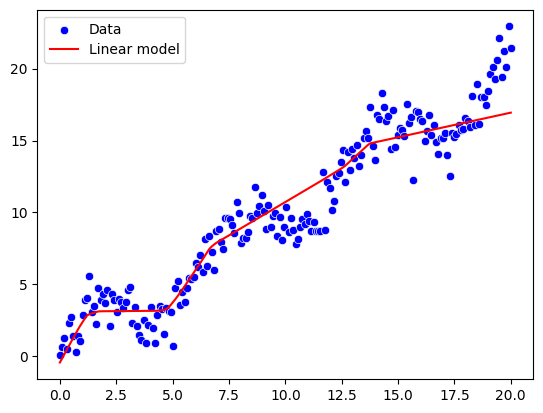

In [103]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
